In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [3]:
new_person = pd.read_csv('synth_New_Person.csv')
family_history_df = pd.read_csv('synth_New_FamilyHX.csv')
visits_df = pd.read_csv('synth_New_Visits.csv')
new_family_hx = pd.read_csv('synth_New_FamilyHX.csv')
new_diagnosis = pd.read_csv('synth_New_Diagnosis.csv')

In [4]:
condition_counts = family_history_df['CONDITION'].value_counts().reset_index()
condition_counts.columns = ['Condition', 'Count']

# Select the top 50 conditions
top_50_conditions = condition_counts.head(50)
top_50_conditions

,Condition,Count
0,High blood pressure,4203
1,Diabetes.....,3960
2,Cancer of prostate,3629
3,Kidney failure......,3096
4,Poor peripheral circulation,2457
5,Breast cancer.....,2239
6,Cerebral palsy,2189
7,Diabetes mellitus,2055
8,Hypertension,1992
9,Diabetes mellitus type 1,1498


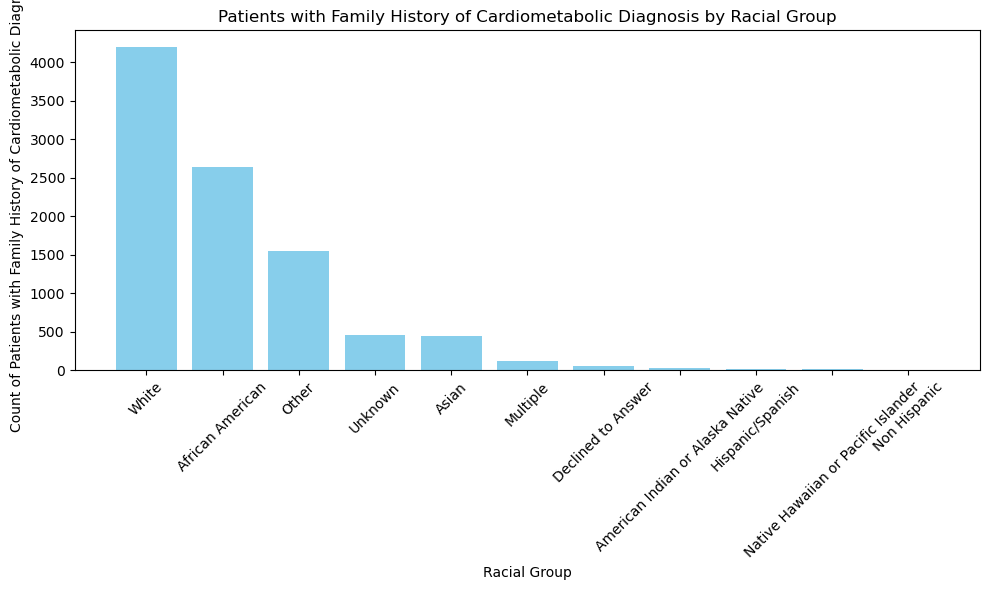

In [5]:
# Filter the FamilyHX dataset for cardiometabolic diagnoses
cardiometabolic_conditions = ['High blood pressure', 'Diabetes', 'Diabetes mellitus', 'Diabetes mellitus type 1', 'Hypertension', 'Heart Attack', 'Stroke', 'Heart Disease', 'High cholesterol', 'Hypercholesteremia', 'Hyperlipidemia']
family_hx_cardiometabolic = new_family_hx[new_family_hx['CONDITION'].isin(cardiometabolic_conditions)]

# Merge the family history with person dataset to get race information
merged_person_familyhx = new_person.merge(family_hx_cardiometabolic, on='PERSON_ID', how='inner')

# Create a table showing patients with history related to cardiometabolic diagnosis by race
cardiometabolic_by_race = merged_person_familyhx[['PERSON_ID', 'RACE', 'CONDITION']].drop_duplicates()

# Aggregating the counts by race for patients with a family history of cardiometabolic diagnosis
cardiometabolic_by_race_counts = cardiometabolic_by_race['RACE'].value_counts().reset_index()
cardiometabolic_by_race_counts.columns = ['RACE', 'Count']

plt.figure(figsize=(10, 6))
plt.bar(cardiometabolic_by_race_counts['RACE'], cardiometabolic_by_race_counts['Count'], color='skyblue')
plt.xlabel('Racial Group')
plt.ylabel('Count of Patients with Family History of Cardiometabolic Diagnosis')
plt.title('Patients with Family History of Cardiometabolic Diagnosis by Racial Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

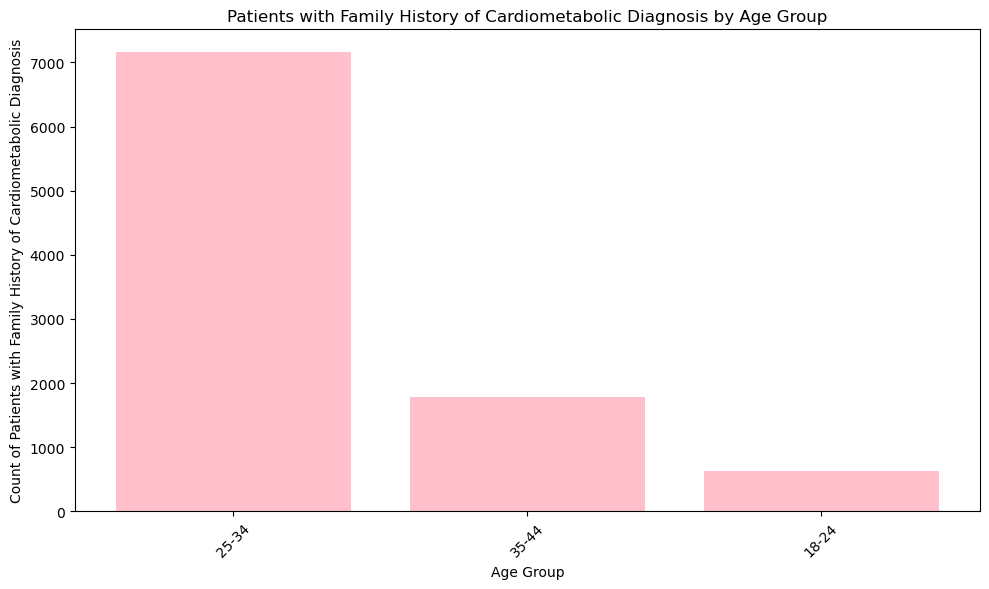

In [6]:
# Create a table showing patients with history related to cardiometabolic diagnosis by age
cardiometabolic_by_age = merged_person_familyhx[['PERSON_ID', 'AGE_GROUP', 'CONDITION']].drop_duplicates()

# Aggregating the counts by age for patients with a family history of cardiometabolic diagnosis
cardiometabolic_by_age_counts = cardiometabolic_by_age['AGE_GROUP'].value_counts().reset_index()
cardiometabolic_by_age_counts.columns = ['AGE_GROUP', 'Count']

plt.figure(figsize=(10, 6))
plt.bar(cardiometabolic_by_age_counts['AGE_GROUP'], cardiometabolic_by_age_counts['Count'], color='pink')
plt.xlabel('Age Group')
plt.ylabel('Count of Patients with Family History of Cardiometabolic Diagnosis')
plt.title('Patients with Family History of Cardiometabolic Diagnosis by Age Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

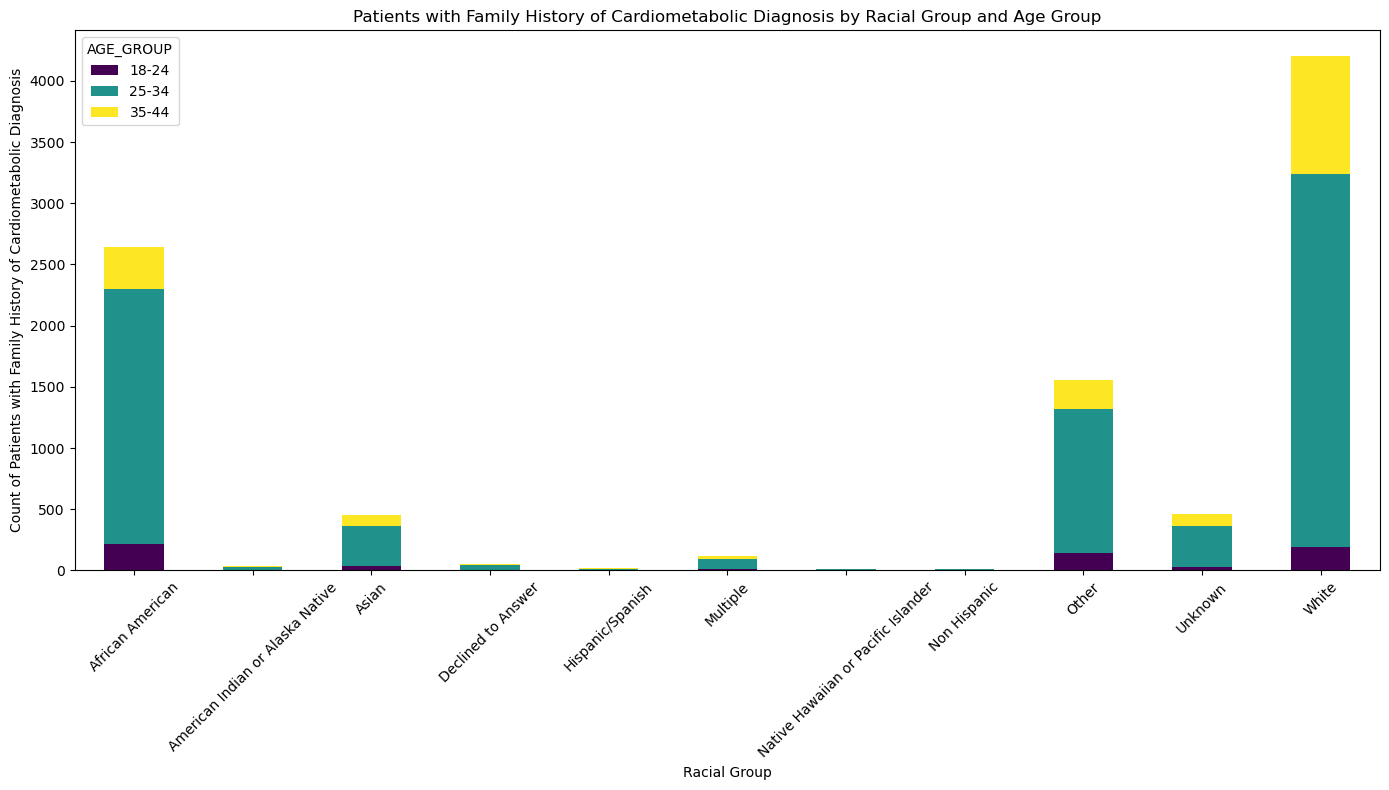

In [7]:
# Define cardiometabolic conditions
cardiometabolic_conditions = [
    'High blood pressure', 'Diabetes', 'Diabetes mellitus', 'Diabetes mellitus type 1',
    'Hypertension', 'Heart Attack', 'Stroke', 'Heart Disease', 'High cholesterol',
    'Hypercholesteremia', 'Hyperlipidemia'
]

# Filter the FamilyHX dataset for cardiometabolic diagnoses
family_hx_cardiometabolic = new_family_hx[new_family_hx['CONDITION'].isin(cardiometabolic_conditions)]

# Merge the family history with person dataset to get race and age group information
merged_person_familyhx = new_person.merge(family_hx_cardiometabolic, on='PERSON_ID', how='inner')

# Create a table showing patients with history related to cardiometabolic diagnosis by race and age group
cardiometabolic_by_race_age = merged_person_familyhx[['PERSON_ID', 'RACE', 'AGE_GROUP', 'CONDITION']].drop_duplicates()

# Aggregating the counts by race and age group for patients with a family history of cardiometabolic diagnosis
cardiometabolic_by_race_age_counts = cardiometabolic_by_race_age.groupby(['RACE', 'AGE_GROUP']).size().unstack(fill_value=0)

cardiometabolic_by_race_age_counts.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.xlabel('Racial Group')
plt.ylabel('Count of Patients with Family History of Cardiometabolic Diagnosis')
plt.title('Patients with Family History of Cardiometabolic Diagnosis by Racial Group and Age Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
cardiometabolic_by_race_counts = merged_person_familyhx['RACE'].value_counts().reset_index()
cardiometabolic_by_race_counts.columns = ['RACE', 'Count']

total_by_race = new_person['RACE'].value_counts().reset_index()
total_by_race.columns = ['RACE', 'Total_Patients']

cardiometabolic_by_race_counts = cardiometabolic_by_race_counts.merge(total_by_race, on='RACE', how='left')

cardiometabolic_by_race_counts['Rate'] = (cardiometabolic_by_race_counts['Count'] / cardiometabolic_by_race_counts['Total_Patients']) * 100
print(cardiometabolic_by_race_counts)

                                   RACE  Count  Total_Patients       Rate
0                                 White   4699           14561  32.271135
1                      African American   2924            9153  31.945810
2                                 Other   1718            5052  34.006334
3                               Unknown    527            1609  32.753263
4                                 Asian    512            1637  31.276726
5                              Multiple    131             413  31.719128
6                    Declined to Answer     54             245  22.040816
7      American Indian or Alaska Native     38             104  36.538462
8                      Hispanic/Spanish     19              50  38.000000
9   Native Hawaiian or Pacific Islander     15              48  31.250000
10                         Non Hispanic     12              41  29.268293


In [9]:
cardiometabolic_by_age_counts = merged_person_familyhx['AGE_GROUP'].value_counts().reset_index()
cardiometabolic_by_age_counts.columns = ['AGE_GROUP', 'Count']

total_by_age = new_person['AGE_GROUP'].value_counts().reset_index()
total_by_age.columns = ['AGE_GROUP', 'Total_Patients']

cardiometabolic_by_age_counts = cardiometabolic_by_age_counts.merge(total_by_age, on='AGE_GROUP', how='left')

cardiometabolic_by_age_counts['Rate'] = (cardiometabolic_by_age_counts['Count'] / cardiometabolic_by_age_counts['Total_Patients']) * 100
print(cardiometabolic_by_age_counts)

  AGE_GROUP  Count  Total_Patients       Rate
0     25-34   7955           24989  31.834007
1     35-44   2000            5829  34.311203
2     18-24    694            2095  33.126492


In [10]:
preeclampsia_events = ['Preeclampsia', 'High Blood Pressure','Hypertension']
diagnosis_preeclampsia = new_diagnosis[new_diagnosis['EVENT_DESC'].str.contains('|'.join(preeclampsia_events), case=False, na=False)]

merged_df_preeclampsia = merged_person_familyhx.merge(diagnosis_preeclampsia, on='PERSON_ID', how='inner')

preeclampsia_event_desc = merged_df_preeclampsia[['PERSON_ID', 'RACE', 'EVENT_DESC']].drop_duplicates()

total_by_race = merged_person_familyhx['RACE'].value_counts().reset_index()
total_by_race.columns = ['RACE', 'Total_Count']

preeclampsia_event_desc_counts = preeclampsia_event_desc['RACE'].value_counts().reset_index()
preeclampsia_event_desc_counts.columns = ['RACE', 'Preeclampsia_Count']

rates_by_race = pd.merge(total_by_race, preeclampsia_event_desc_counts, on='RACE', how='left')
rates_by_race['Preeclampsia_Rate'] = (rates_by_race['Preeclampsia_Count'] / rates_by_race['Total_Count']) * 100

rates_by_race = rates_by_race.fillna(0)
print(rates_by_race[['RACE', 'Total_Count', 'Preeclampsia_Count', 'Preeclampsia_Rate']])

                                   RACE  Total_Count  Preeclampsia_Count  \
0                                 White         4699                2597   
1                      African American         2924                1733   
2                                 Other         1718                 991   
3                               Unknown          527                 289   
4                                 Asian          512                 306   
5                              Multiple          131                  73   
6                    Declined to Answer           54                  43   
7      American Indian or Alaska Native           38                  16   
8                      Hispanic/Spanish           19                  13   
9   Native Hawaiian or Pacific Islander           15                  11   
10                         Non Hispanic           12                   5   

    Preeclampsia_Rate  
0           55.267078  
1           59.268126  
2           57.

  AGE_GROUP  Total_Count  Preeclampsia_Count  Preeclampsia_Rate
0     25-34         7955                4555          57.259585
1     35-44         2000                1110          55.500000
2     18-24          694                 412          59.365994


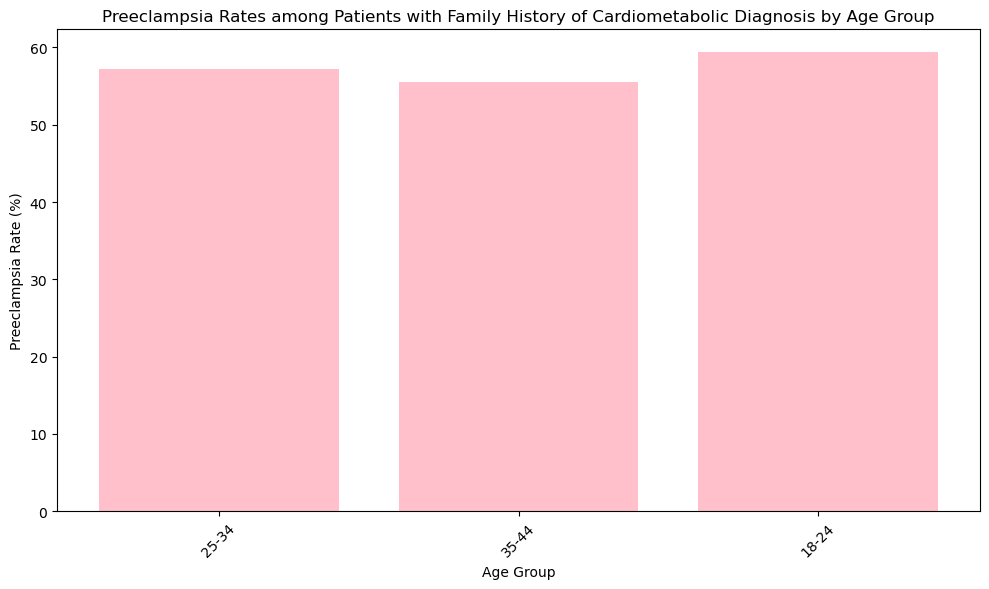

In [11]:
merged_df_preeclampsia = merged_person_familyhx.merge(diagnosis_preeclampsia, on='PERSON_ID', how='inner')

preeclampsia_event_desc = merged_df_preeclampsia[['PERSON_ID', 'AGE_GROUP', 'EVENT_DESC']].drop_duplicates()

total_by_age = merged_person_familyhx['AGE_GROUP'].value_counts().reset_index()
total_by_age.columns = ['AGE_GROUP', 'Total_Count']

preeclampsia_event_desc_counts = preeclampsia_event_desc['AGE_GROUP'].value_counts().reset_index()
preeclampsia_event_desc_counts.columns = ['AGE_GROUP', 'Preeclampsia_Count']

rates_by_age = pd.merge(total_by_age, preeclampsia_event_desc_counts, on='AGE_GROUP', how='left')
rates_by_age['Preeclampsia_Rate'] = (rates_by_age['Preeclampsia_Count'] / rates_by_age['Total_Count']) * 100

rates_by_age = rates_by_age.fillna(0)
print(rates_by_age[['AGE_GROUP', 'Total_Count', 'Preeclampsia_Count', 'Preeclampsia_Rate']])

plt.figure(figsize=(10, 6))
plt.bar(rates_by_age['AGE_GROUP'], rates_by_age['Preeclampsia_Rate'], color='pink')
plt.xlabel('Age Group')
plt.ylabel('Preeclampsia Rate (%)')
plt.title('Preeclampsia Rates among Patients with Family History of Cardiometabolic Diagnosis by Age Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


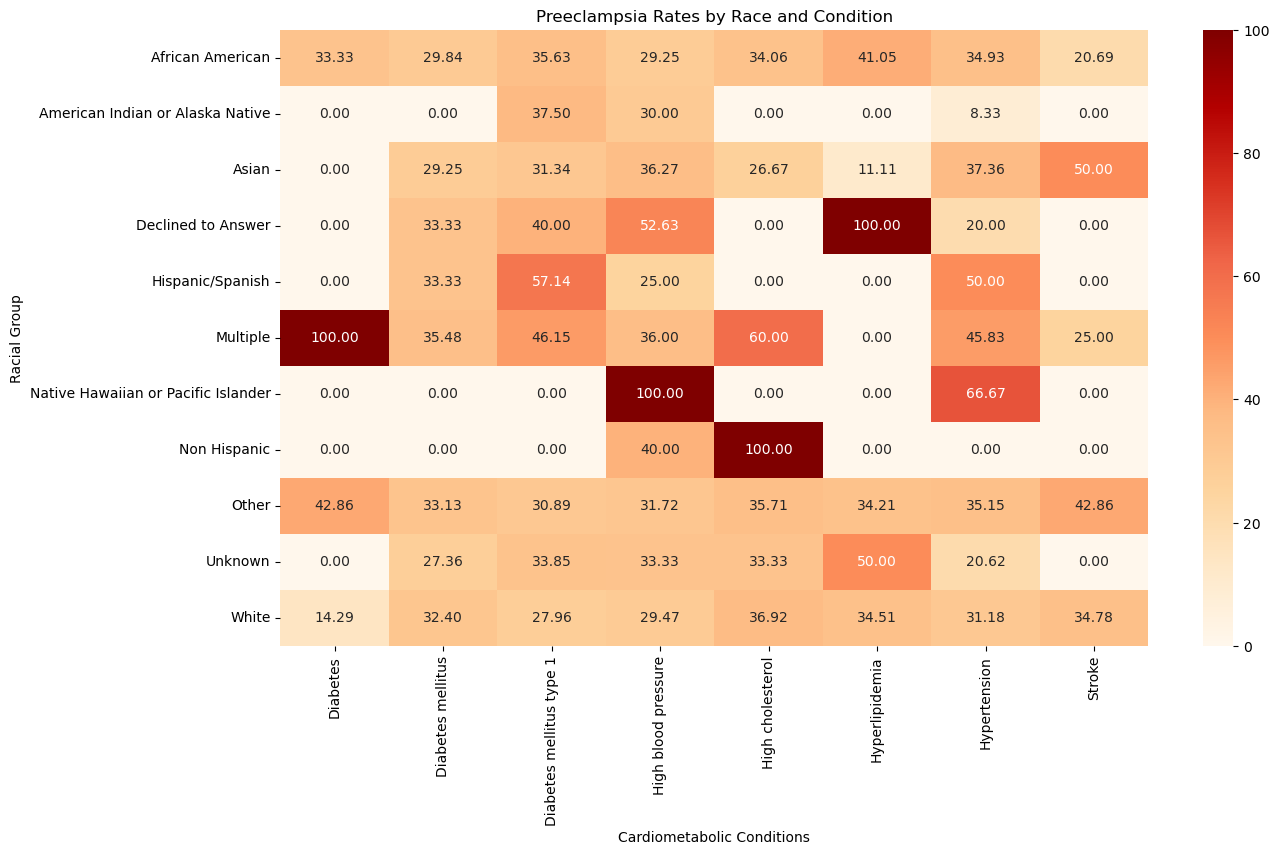

In [17]:
# Filter the FamilyHX dataset for cardiometabolic diagnoses
cardiometabolic_conditions = [
    'High blood pressure', 'Diabetes', 'Diabetes mellitus', 'Diabetes mellitus type 1',
    'Hypertension', 'Heart Attack', 'Stroke', 'Heart Disease', 'High cholesterol',
    'Hypercholesteremia', 'Hyperlipidemia'
]
family_hx_cardiometabolic = new_family_hx[new_family_hx['CONDITION'].isin(cardiometabolic_conditions)]

# Filter the Diagnosis dataset for preeclampsia-related event descriptions
preeclampsia_events = ['Pre-eclampsia']
diagnosis_preeclampsia = new_diagnosis[new_diagnosis['EVENT_DESC'].str.contains('|'.join(preeclampsia_events), case=False, na=False)]

# Merge the family history with person dataset to get race information
merged_person_familyhx = new_person.merge(family_hx_cardiometabolic, on='PERSON_ID', how='inner')

# Merge the datasets to connect individuals across the datasets
merged_df_preeclampsia = merged_person_familyhx.merge(diagnosis_preeclampsia, on='PERSON_ID', how='inner')

# Calculate the total number of patients by race with a family history of each cardiometabolic diagnosis
condition_counts_by_race = merged_person_familyhx.groupby(['RACE', 'CONDITION']).size().unstack(fill_value=0)

# Calculate the number of preeclampsia cases by race and condition
preeclampsia_condition_counts_by_race = merged_df_preeclampsia.groupby(['RACE', 'CONDITION']).size().unstack(fill_value=0)

# Calculate the rates
preeclampsia_rates_by_race_condition = (preeclampsia_condition_counts_by_race / condition_counts_by_race) * 100

# Fill NA values with 0
preeclampsia_rates_by_race_condition = preeclampsia_rates_by_race_condition.fillna(0)

# Plotting the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(preeclampsia_rates_by_race_condition, annot=True, fmt=".2f", cmap="OrRd")
plt.title('Preeclampsia Rates by Race and Condition')
plt.xlabel('Cardiometabolic Conditions')
plt.ylabel('Racial Group')
plt.show()


AGE_GROUP                            18-24  25-34  35-44
RACE                                                    
African American                       227   2310    387
American Indian or Alaska Native         1     31      6
Asian                                   36    377     99
Declined to Answer                       6     41      7
Hispanic/Spanish                         0     12      7
Multiple                                11     92     28
Native Hawaiian or Pacific Islander      0     13      2
Non Hispanic                             1     11      0
Other                                  164   1291    263
Unknown                                 31    384    112
White                                  217   3393   1089


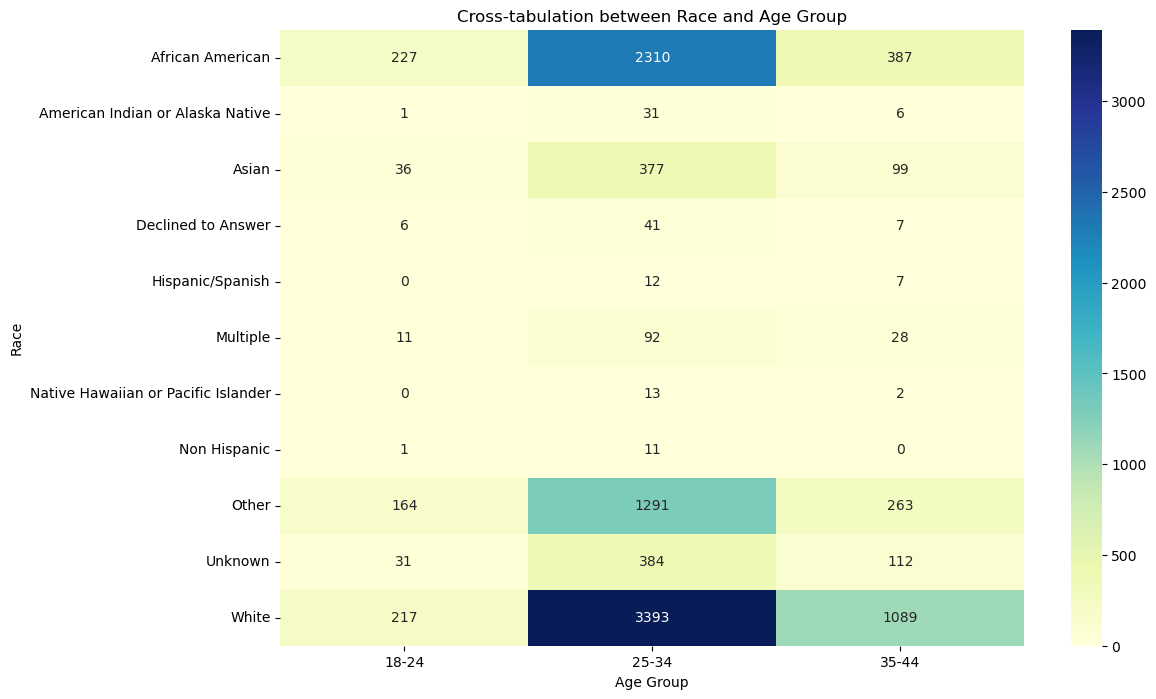

In [19]:
cross_tab = pd.crosstab(merged_person_familyhx['RACE'], merged_person_familyhx['AGE_GROUP'])
print(cross_tab)

plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Cross-tabulation between Race and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Race')
plt.show()

AGE_GROUP                                18-24      25-34  35-44
RACE                                                            
African American                     32.708934  29.038341  19.35
American Indian or Alaska Native      0.144092   0.389692   0.30
Asian                                 5.187320   4.739158   4.95
Declined to Answer                    0.864553   0.515399   0.35
Hispanic/Spanish                      0.000000   0.150849   0.35
Multiple                              1.585014   1.156505   1.40
Native Hawaiian or Pacific Islander   0.000000   0.163419   0.10
Non Hispanic                          0.144092   0.138278   0.00
Other                                23.631124  16.228787  13.15
Unknown                               4.466859   4.827153   5.60
White                                31.268012  42.652420  54.45


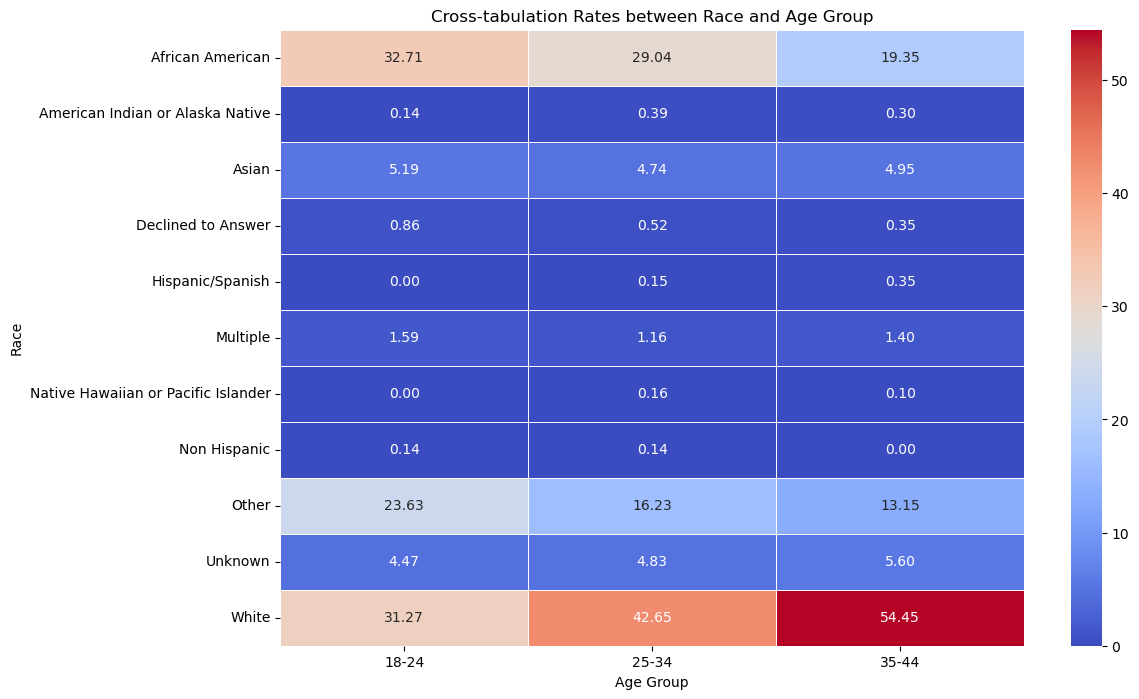

In [20]:
cross_tab_counts = pd.crosstab(merged_person_familyhx['RACE'], merged_person_familyhx['AGE_GROUP'])

# Calculate the total number of individuals in each age group
age_group_totals = cross_tab_counts.sum(axis=0)

# Calculate the rates by dividing counts by the total number of individuals in each age group
cross_tab_rates = cross_tab_counts.div(age_group_totals, axis=1) * 100

# Display the cross-tabulation rates table
print(cross_tab_rates)

# Plotting the cross-tabulation as a heatmap with a custom colormap
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab_rates, annot=True, fmt='.2f', cmap='coolwarm', linewidths=.5)
plt.title('Cross-tabulation Rates between Race and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Race')
plt.show()

In [29]:
import pandas as pd

# Load the datasets
visits_df = pd.read_csv('synth_New_Visits.csv')
new_person = pd.read_csv('synth_New_Person.csv')
new_family_hx = pd.read_csv('synth_New_FamilyHX.csv')
new_diagnosis = pd.read_csv('synth_New_Diagnosis.csv')

# Define the cardiovascular diseases and preeclampsia-related conditions
cardiovascular_diseases = [
    'High blood pressure', 'Diabetes', 'Diabetes mellitus', 'Diabetes mellitus type 1',
    'Hypertension', 'Heart Attack', 'Stroke', 'Heart Disease', 'High cholesterol',
    'Hypercholesteremia', 'Hyperlipidemia'
]
preeclampsia_conditions = ['Preeclampsia', 'Hypertension', 'High Blood Pressure']

# Filter for individuals with a family history of cardiovascular diseases
family_hx_cardiovascular = new_family_hx[new_family_hx['CONDITION'].isin(cardiovascular_diseases)]

# Filter for individuals diagnosed with preeclampsia-related conditions
diagnosis_preeclampsia = new_diagnosis[new_diagnosis['EVENT_DESC'].str.contains('|'.join(preeclampsia_conditions), case=False, na=False)]

# Merge family history with person dataset to get race information
merged_person_familyhx = new_person.merge(family_hx_cardiovascular, on='PERSON_ID', how='inner')

# Ensure unique PERSON_ID in the merged_person_familyhx
merged_person_familyhx = merged_person_familyhx.drop_duplicates('PERSON_ID')

# Merge the datasets to connect individuals across the datasets
merged_df_preeclampsia = merged_person_familyhx.merge(diagnosis_preeclampsia, on='PERSON_ID', how='inner')

# Filter the visits data for individuals in the merged_df_preeclampsia
merged_visits = visits_df.merge(merged_df_preeclampsia[['PERSON_ID', 'RACE']], on='PERSON_ID', how='inner')

# Filter the dataset for the specified races
specified_races = ['White', 'African American', 'Other', 'Unknown', 'Asian']
filtered_visits_df = merged_visits[merged_visits['RACE'].isin(specified_races)]

# Group by RACE and REASON_FOR_VISIT and count the occurrences
visit_reason_counts = filtered_visits_df.groupby(['RACE', 'REASON_FOR_VISIT']).size().reset_index(name='Count')

# Get the top three reasons for visits for each race
top_3_reasons_per_race = visit_reason_counts.groupby('RACE').apply(lambda x: x.nlargest(3, 'Count')).reset_index(drop=True)

# Display the table of top 3 reasons per race
print("Top 3 Reasons for Visits by Race:")
print(top_3_reasons_per_race)

# Calculate and display the population count for each race
population_counts = merged_df_preeclampsia['RACE'].value_counts().reset_index()
population_counts.columns = ['RACE', 'Population_Count']
print("\nPopulation Count by Race:")
print(population_counts)

Top 3 Reasons for Visits by Race:
                RACE           REASON_FOR_VISIT  Count
0   African American                        ROB    124
1   African American            rob 1hr gulcose     45
2   African American         C-SECTION DELIVERY     35
3              Asian                        ROB     22
4              Asian  38 WKS 5 DYS CONTRACTIONS      8
5              Asian                        IGU      7
6              Other                        ROB     49
7              Other         C-SECTION DELIVERY     22
8              Other                     RTN OB     17
9            Unknown                        ROB     23
10           Unknown         35WKS CONTRACTIONS     10
11           Unknown                  RETURN OB      6
12             White                        ROB    152
13             White  38 WKS 5 DYS CONTRACTIONS     45
14             White         C-SECTION DELIVERY     45

Population Count by Race:
                                   RACE  Population_Count
0

In [33]:
import pandas as pd

# Load the datasets
visits_df = pd.read_csv('synth_New_Visits.csv')
new_person = pd.read_csv('synth_New_Person.csv')

# Merge the person dataset with the visits dataset to get race information
merged_visits = visits_df.merge(new_person[['PERSON_ID', 'RACE']], on='PERSON_ID', how='inner')

# Filter the dataset for the specified races
specified_races = ['White', 'African American', 'Other', 'Unknown', 'Asian']
filtered_visits_df = merged_visits[merged_visits['RACE'].isin(specified_races)]

# Group by RACE and REASON_FOR_VISIT and count the occurrences
visit_reason_counts = filtered_visits_df.groupby(['RACE', 'REASON_FOR_VISIT']).size().reset_index(name='Count')

# Get the top three reasons for visits for each race
top_3_reasons_per_race = visit_reason_counts.groupby('RACE').apply(lambda x: x.nlargest(3, 'Count')).reset_index(drop=True)

# Display the table of top 3 reasons per race
print("Top 3 Reasons for Visits by Race:")
print(top_3_reasons_per_race)

# Calculate and display the population count for each race
population_counts = filtered_visits_df[['PERSON_ID', 'RACE']].drop_duplicates().groupby('RACE').size().reset_index(name='Population_Count')
print("\nPopulation Count by Race:")
print(population_counts)

Top 3 Reasons for Visits by Race:
                RACE    REASON_FOR_VISIT  Count
0   African American                 ROB   2610
1   African American  C-SECTION DELIVERY    720
2   African American     rob 1hr gulcose    683
3              Asian                 ROB    473
4              Asian     rob 1hr gulcose    134
5              Asian  C-SECTION DELIVERY    111
6              Other                 ROB   1368
7              Other     rob 1hr gulcose    349
8              Other  C-SECTION DELIVERY    346
9            Unknown                 ROB    482
10           Unknown  C-SECTION DELIVERY    116
11           Unknown     rob 1hr gulcose    105
12             White                 ROB   4183
13             White  C-SECTION DELIVERY   1065
14             White     rob 1hr gulcose   1025

Population Count by Race:
               RACE  Population_Count
0  African American              9153
1             Asian              1637
2             Other              5052
3           Unknown

In [34]:
import pandas as pd

# Load the datasets
visits_df = pd.read_csv('synth_New_Visits.csv')
new_person = pd.read_csv('synth_New_Person.csv')
new_family_hx = pd.read_csv('synth_New_FamilyHX.csv')

# Define the cardiovascular diseases
cardiovascular_diseases = [
    'High blood pressure', 'Diabetes', 'Diabetes mellitus', 'Diabetes mellitus type 1',
    'Hypertension', 'Heart Attack', 'Stroke', 'Heart Disease', 'High cholesterol',
    'Hypercholesteremia', 'Hyperlipidemia'
]

# Filter for individuals with a family history of cardiovascular diseases
family_hx_cardiovascular = new_family_hx[new_family_hx['CONDITION'].isin(cardiovascular_diseases)]

# Merge with person dataset to get race information
merged_person_familyhx = new_person.merge(family_hx_cardiovascular[['PERSON_ID']], on='PERSON_ID', how='inner')

# Merge with visits data to get reason for visit
merged_visits = visits_df.merge(merged_person_familyhx[['PERSON_ID', 'RACE']], on='PERSON_ID', how='inner')

# Filter the dataset for the specified races
specified_races = ['White', 'African American', 'Other', 'Unknown', 'Asian']
filtered_visits_df = merged_visits[merged_visits['RACE'].isin(specified_races)]

# Group by RACE and REASON_FOR_VISIT and count the occurrences
visit_reason_counts = filtered_visits_df.groupby(['RACE', 'REASON_FOR_VISIT']).size().reset_index(name='Count')

# Get the top three reasons for visits for each race
top_3_reasons_per_race = visit_reason_counts.groupby('RACE').apply(lambda x: x.nlargest(3, 'Count')).reset_index(drop=True)

# Display the table of top 3 reasons per race
print("Top 3 Reasons for Visits by Race:")
print(top_3_reasons_per_race)

# Calculate and display the population count for each race
population_counts = filtered_visits_df[['PERSON_ID', 'RACE']].drop_duplicates().groupby('RACE').size().reset_index(name='Population_Count')
print("\nPopulation Count by Race:")
print(population_counts)

Top 3 Reasons for Visits by Race:
                RACE                   REASON_FOR_VISIT  Count
0   African American                                ROB    216
1   African American                    rob 1hr gulcose     72
2   African American                 35WKS CONTRACTIONS     55
3              Asian                                ROB     51
4              Asian                    rob 1hr gulcose     11
5              Asian                 C-SECTION DELIVERY     10
6              Other                                ROB    110
7              Other                 C-SECTION DELIVERY     42
8              Other                    rob 1hr gulcose     39
9            Unknown                                ROB     43
10           Unknown                                 OB     14
11           Unknown  PREGNANCY PRIVATE  38.6 INDUCTION     11
12             White                                ROB    321
13             White                 C-SECTION DELIVERY    120
14             White 

In [39]:
import pandas as pd

# Load the datasets
new_person = pd.read_csv('synth_New_Person.csv')
new_family_hx = pd.read_csv('synth_New_FamilyHX.csv')
visits_df = pd.read_csv('synth_New_Visits.csv')

# Define the cardiovascular diseases
cardiovascular_diseases = [
    'High blood pressure', 'Diabetes', 'Diabetes mellitus', 'Diabetes mellitus type 1',
    'Hypertension', 'Heart Attack', 'Stroke', 'Heart Disease', 'High cholesterol',
    'Hypercholesteremia', 'Hyperlipidemia'
]

# Filter for individuals with a family history of cardiovascular diseases
family_hx_cardiovascular = new_family_hx[new_family_hx['CONDITION'].isin(cardiovascular_diseases)]

# Merge family history with person dataset to get race information
merged_person_familyhx = new_person.merge(family_hx_cardiovascular, on='PERSON_ID', how='inner')

# Ensure only specified races are considered
specified_races = ['White', 'African American', 'Other', 'Unknown', 'Asian']
filtered_person_familyhx = merged_person_familyhx[merged_person_familyhx['RACE'].isin(specified_races)]

# Calculate the population count for each race from the filtered dataset
population_counts = filtered_person_familyhx['RACE'].value_counts().reset_index()
population_counts.columns = ['RACE', 'Population_Count']

print("Population Count by Race from Filtered Dataset:")
print(population_counts)

# Merge with visits data to get reason for visit
merged_visits = visits_df.merge(filtered_person_familyhx[['PERSON_ID', 'RACE']], on='PERSON_ID', how='inner')

# Group by RACE and REASON_FOR_VISIT and count the occurrences
visit_reason_counts = merged_visits.groupby(['RACE', 'REASON_FOR_VISIT']).size().reset_index(name='Count')

# Get the top three reasons for visits for each race
top_3_reasons_per_race = visit_reason_counts.groupby('RACE').apply(lambda x: x.nlargest(3, 'Count')).reset_index(drop=True)

# Display the table of top 3 reasons per race
print("\nTop 3 Reasons for Visits by Race:")
print(top_3_reasons_per_race)


Population Count by Race from Filtered Dataset:
               RACE  Population_Count
0             White              4699
1  African American              2924
2             Other              1718
3           Unknown               527
4             Asian               512

Top 3 Reasons for Visits by Race:
                RACE                   REASON_FOR_VISIT  Count
0   African American                                ROB    216
1   African American                    rob 1hr gulcose     72
2   African American                 35WKS CONTRACTIONS     55
3              Asian                                ROB     51
4              Asian                    rob 1hr gulcose     11
5              Asian                 C-SECTION DELIVERY     10
6              Other                                ROB    110
7              Other                 C-SECTION DELIVERY     42
8              Other                    rob 1hr gulcose     39
9            Unknown                                ROB    

Population Count by Race from Filtered Dataset:
               RACE  Population_Count
0             White              4699
1  African American              2924
2             Other              1718
3           Unknown               527
4             Asian               512

Top 3 Reasons for Visits by Race:
                RACE                   REASON_FOR_VISIT  Count
0   African American                                ROB    216
1   African American                    rob 1hr gulcose     72
2   African American                 35WKS CONTRACTIONS     55
3              Asian                                ROB     51
4              Asian                    rob 1hr gulcose     11
5              Asian                 C-SECTION DELIVERY     10
6              Other                                ROB    110
7              Other                 C-SECTION DELIVERY     42
8              Other                    rob 1hr gulcose     39
9            Unknown                                ROB    

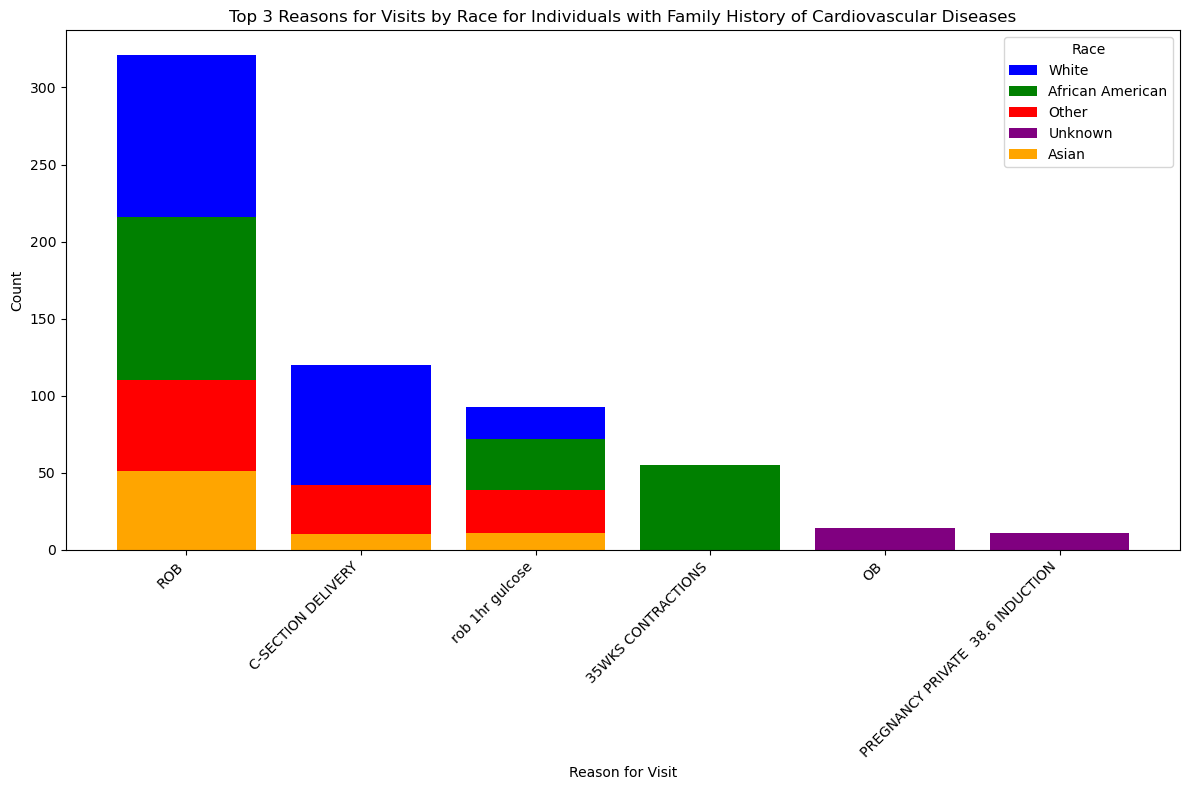

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
new_person = pd.read_csv('synth_New_Person.csv')
new_family_hx = pd.read_csv('synth_New_FamilyHX.csv')
visits_df = pd.read_csv('synth_New_Visits.csv')

# Define the cardiovascular diseases
cardiovascular_diseases = [
    'High blood pressure', 'Diabetes', 'Diabetes mellitus', 'Diabetes mellitus type 1',
    'Hypertension', 'Heart Attack', 'Stroke', 'Heart Disease', 'High cholesterol',
    'Hypercholesteremia', 'Hyperlipidemia'
]

# Filter for individuals with a family history of cardiovascular diseases
family_hx_cardiovascular = new_family_hx[new_family_hx['CONDITION'].isin(cardiovascular_diseases)]

# Merge family history with person dataset to get race information
merged_person_familyhx = new_person.merge(family_hx_cardiovascular, on='PERSON_ID', how='inner')

# Ensure only specified races are considered
specified_races = ['White', 'African American', 'Other', 'Unknown', 'Asian']
filtered_person_familyhx = merged_person_familyhx[merged_person_familyhx['RACE'].isin(specified_races)]

# Calculate the population count for each race from the filtered dataset
population_counts = filtered_person_familyhx['RACE'].value_counts().reset_index()
population_counts.columns = ['RACE', 'Population_Count']

print("Population Count by Race from Filtered Dataset:")
print(population_counts)

# Merge with visits data to get reason for visit
merged_visits = visits_df.merge(filtered_person_familyhx[['PERSON_ID', 'RACE']], on='PERSON_ID', how='inner')

# Group by RACE and REASON_FOR_VISIT and count the occurrences
visit_reason_counts = merged_visits.groupby(['RACE', 'REASON_FOR_VISIT']).size().reset_index(name='Count')

# Get the top three reasons for visits for each race
top_3_reasons_per_race = visit_reason_counts.groupby('RACE').apply(lambda x: x.nlargest(3, 'Count')).reset_index(drop=True)

# Display the table of top 3 reasons per race
print("\nTop 3 Reasons for Visits by Race:")
print(top_3_reasons_per_race)

# Create the bar graph
fig, ax = plt.subplots(figsize=(12, 8))

# Define colors for each race
colors = {
    'White': 'blue',
    'African American': 'green',
    'Other': 'red',
    'Unknown': 'purple',
    'Asian': 'orange'
}

# Plot each race's top 3 reasons for visit
for race in specified_races:
    race_data = top_3_reasons_per_race[top_3_reasons_per_race['RACE'] == race]
    ax.bar(race_data['REASON_FOR_VISIT'], race_data['Count'], color=colors[race], label=race)

# Customize the plot
ax.set_xlabel('Reason for Visit')
ax.set_ylabel('Count')
ax.set_title('Top 3 Reasons for Visits by Race for Individuals with Family History of Cardiovascular Diseases')
ax.legend(title='Race')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


Population Count by Race from Filtered Dataset:
               RACE  Population_Count
0             White              3886
1  African American              2504
2             Other              1448
3             Asian               453
4           Unknown               435

Top 3 Reasons for Visits by Race:
                RACE           REASON_FOR_VISIT  Count
0   African American                        ROB    179
1   African American            rob 1hr gulcose     64
2   African American  38 WKS 5 DYS CONTRACTIONS     50
3              Asian                        ROB     31
4              Asian  38 WKS 5 DYS CONTRACTIONS     20
5              Asian      **ROB 36W 2D-OFFICE**     15
6              Other                        ROB     64
7              Other         C-SECTION DELIVERY     43
8              Other                     RTN OB     24
9            Unknown                        ROB     35
10           Unknown         35WKS CONTRACTIONS     13
11           Unknown         

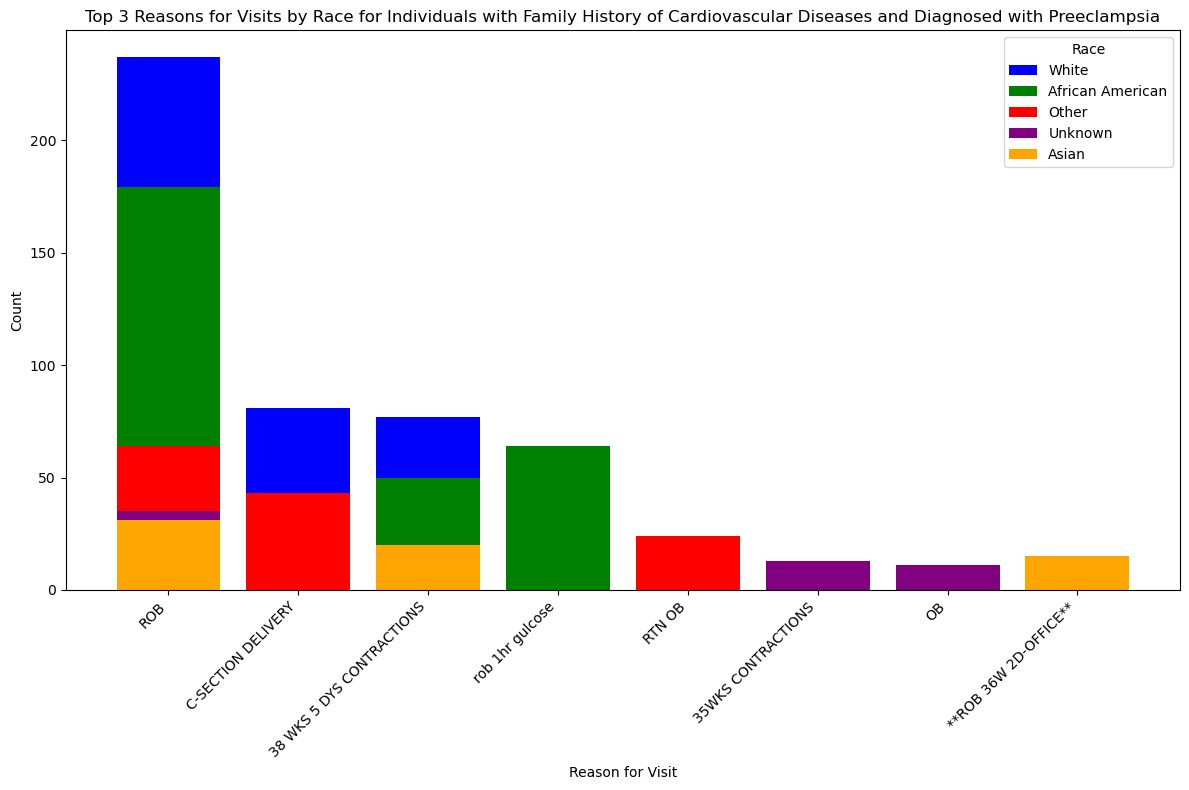

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
new_person = pd.read_csv('synth_New_Person.csv')
new_family_hx = pd.read_csv('synth_New_FamilyHX.csv')
visits_df = pd.read_csv('synth_New_Visits.csv')
new_diagnosis = pd.read_csv('synth_New_Diagnosis.csv')

# Define the cardiovascular diseases and preeclampsia-related conditions
cardiovascular_diseases = [
    'High blood pressure', 'Diabetes', 'Diabetes mellitus', 'Diabetes mellitus type 1',
    'Hypertension', 'Heart Attack', 'Stroke', 'Heart Disease', 'High cholesterol',
    'Hypercholesteremia', 'Hyperlipidemia'
]
preeclampsia_conditions = ['Preeclampsia', 'Hypertension', 'High Blood Pressure']

# Filter for individuals with a family history of cardiovascular diseases
family_hx_cardiovascular = new_family_hx[new_family_hx['CONDITION'].isin(cardiovascular_diseases)]

# Filter for individuals diagnosed with preeclampsia-related conditions
diagnosis_preeclampsia = new_diagnosis[new_diagnosis['EVENT_DESC'].str.contains('|'.join(preeclampsia_conditions), case=False, na=False)]

# Merge family history with diagnosis to find individuals meeting both criteria
merged_hx_diagnosis = family_hx_cardiovascular.merge(diagnosis_preeclampsia, on='PERSON_ID', how='inner')

# Merge with person dataset to get race information
merged_person_hx_diagnosis = merged_hx_diagnosis.merge(new_person[['PERSON_ID', 'RACE']], on='PERSON_ID', how='inner')

# Ensure only specified races are considered
specified_races = ['White', 'African American', 'Other', 'Unknown', 'Asian']
filtered_person_hx_diagnosis = merged_person_hx_diagnosis[merged_person_hx_diagnosis['RACE'].isin(specified_races)]

# Calculate the population count for each race from the filtered dataset
population_counts = filtered_person_hx_diagnosis['RACE'].value_counts().reset_index()
population_counts.columns = ['RACE', 'Population_Count']

print("Population Count by Race from Filtered Dataset:")
print(population_counts)

# Merge with visits data to get reason for visit
merged_visits = visits_df.merge(filtered_person_hx_diagnosis[['PERSON_ID', 'RACE']], on='PERSON_ID', how='inner')

# Group by RACE and REASON_FOR_VISIT and count the occurrences
visit_reason_counts = merged_visits.groupby(['RACE', 'REASON_FOR_VISIT']).size().reset_index(name='Count')

# Get the top three reasons for visits for each race
top_3_reasons_per_race = visit_reason_counts.groupby('RACE').apply(lambda x: x.nlargest(3, 'Count')).reset_index(drop=True)

# Display the table of top 3 reasons per race
print("\nTop 3 Reasons for Visits by Race:")
print(top_3_reasons_per_race)

# Create the bar graph
fig, ax = plt.subplots(figsize=(12, 8))

# Define colors for each race
colors = {
    'White': 'blue',
    'African American': 'green',
    'Other': 'red',
    'Unknown': 'purple',
    'Asian': 'orange'
}

# Plot each race's top 3 reasons for visit
for race in specified_races:
    race_data = top_3_reasons_per_race[top_3_reasons_per_race['RACE'] == race]
    ax.bar(race_data['REASON_FOR_VISIT'], race_data['Count'], color=colors[race], label=race)

# Customize the plot
ax.set_xlabel('Reason for Visit')
ax.set_ylabel('Count')
ax.set_title('Top 3 Reasons for Visits by Race for Individuals with Family History of Cardiovascular Diseases and Diagnosed with Preeclampsia')
ax.legend(title='Race')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

                                   RACE  Total_Count  Preeclampsia_Count  \
0                                 White         4699                2597   
1                      African American         2924                1733   
2                                 Other         1718                 991   
3                               Unknown          527                 289   
4                                 Asian          512                 306   
5                              Multiple          131                  73   
6                    Declined to Answer           54                  43   
7      American Indian or Alaska Native           38                  16   
8                      Hispanic/Spanish           19                  13   
9   Native Hawaiian or Pacific Islander           15                  11   
10                         Non Hispanic           12                   5   

    Preeclampsia_Rate  
0           55.267078  
1           59.268126  
2           57.

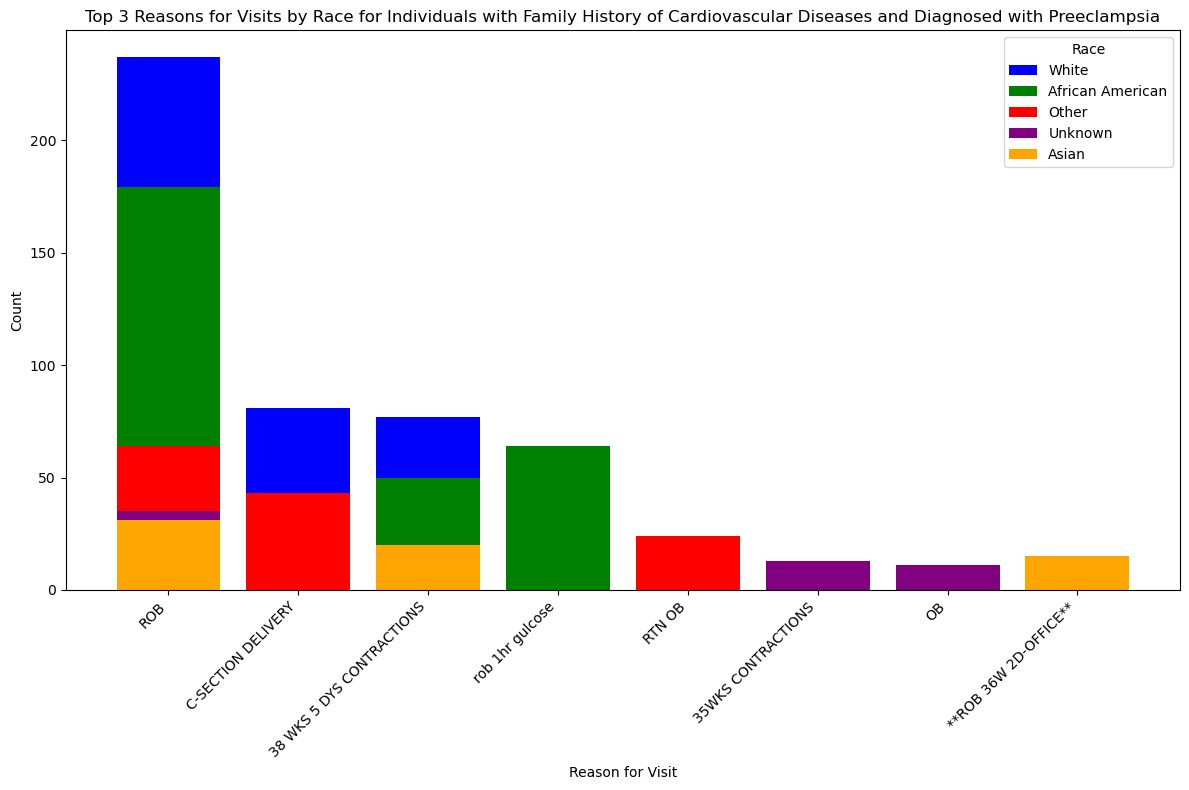

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
new_person = pd.read_csv('synth_New_Person.csv')
new_family_hx = pd.read_csv('synth_New_FamilyHX.csv')
visits_df = pd.read_csv('synth_New_Visits.csv')
new_diagnosis = pd.read_csv('synth_New_Diagnosis.csv')

# Define the cardiovascular diseases and preeclampsia-related conditions
cardiovascular_diseases = [
    'High blood pressure', 'Diabetes', 'Diabetes mellitus', 'Diabetes mellitus type 1',
    'Hypertension', 'Heart Attack', 'Stroke', 'Heart Disease', 'High cholesterol',
    'Hypercholesteremia', 'Hyperlipidemia'
]
preeclampsia_events = ['Preeclampsia', 'High Blood Pressure', 'Hypertension']

# Filter for individuals with a family history of cardiovascular diseases
family_hx_cardiovascular = new_family_hx[new_family_hx['CONDITION'].isin(cardiovascular_diseases)]

# Merge family history with person dataset to get race information
merged_person_familyhx = new_person.merge(family_hx_cardiovascular, on='PERSON_ID', how='inner')

# Filter for individuals diagnosed with preeclampsia-related conditions
diagnosis_preeclampsia = new_diagnosis[new_diagnosis['EVENT_DESC'].str.contains('|'.join(preeclampsia_events), case=False, na=False)]

# Merge the datasets to find individuals meeting both criteria
merged_df_preeclampsia = merged_person_familyhx.merge(diagnosis_preeclampsia, on='PERSON_ID', how='inner')

# Calculate the total number of patients by race with a family history of cardiometabolic diagnosis
preeclampsia_event_desc = merged_df_preeclampsia[['PERSON_ID', 'RACE', 'EVENT_DESC']].drop_duplicates()
total_by_race = merged_person_familyhx['RACE'].value_counts().reset_index()
total_by_race.columns = ['RACE', 'Total_Count']
preeclampsia_event_desc_counts = preeclampsia_event_desc['RACE'].value_counts().reset_index()
preeclampsia_event_desc_counts.columns = ['RACE', 'Preeclampsia_Count']
rates_by_race = pd.merge(total_by_race, preeclampsia_event_desc_counts, on='RACE', how='left')
rates_by_race['Preeclampsia_Rate'] = (rates_by_race['Preeclampsia_Count'] / rates_by_race['Total_Count']) * 100
rates_by_race = rates_by_race.fillna(0)
print(rates_by_race[['RACE', 'Total_Count', 'Preeclampsia_Count', 'Preeclampsia_Rate']])

# Merge with visits data to get reason for visit
merged_visits = visits_df.merge(merged_df_preeclampsia[['PERSON_ID', 'RACE']], on='PERSON_ID', how='inner')

# Filter the dataset for the specified races
specified_races = ['White', 'African American', 'Other', 'Unknown', 'Asian']
filtered_visits_df = merged_visits[merged_visits['RACE'].isin(specified_races)]

# Group by RACE and REASON_FOR_VISIT and count the occurrences
visit_reason_counts = filtered_visits_df.groupby(['RACE', 'REASON_FOR_VISIT']).size().reset_index(name='Count')

# Get the top three reasons for visits for each race
top_3_reasons_per_race = visit_reason_counts.groupby('RACE').apply(lambda x: x.nlargest(3, 'Count')).reset_index(drop=True)

# Display the table of top 3 reasons per race
print("\nTop 3 Reasons for Visits by Race:")
print(top_3_reasons_per_race)

# Create the bar graph
fig, ax = plt.subplots(figsize=(12, 8))

# Define colors for each race
colors = {
    'White': 'blue',
    'African American': 'green',
    'Other': 'red',
    'Unknown': 'purple',
    'Asian': 'orange'
}

# Plot each race's top 3 reasons for visit
for race in specified_races:
    race_data = top_3_reasons_per_race[top_3_reasons_per_race['RACE'] == race]
    ax.bar(race_data['REASON_FOR_VISIT'], race_data['Count'], color=colors[race], label=race)

# Customize the plot
ax.set_xlabel('Reason for Visit')
ax.set_ylabel('Count')
ax.set_title('Top 3 Reasons for Visits by Race for Individuals with Family History of Cardiovascular Diseases and Diagnosed with Preeclampsia')
ax.legend(title='Race')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

                                   RACE  Total_Count  Preeclampsia_Count  \
0                                 White         4699                2597   
1                      African American         2924                1733   
2                                 Other         1718                 991   
3                               Unknown          527                 289   
4                                 Asian          512                 306   
5                              Multiple          131                  73   
6                    Declined to Answer           54                  43   
7      American Indian or Alaska Native           38                  16   
8                      Hispanic/Spanish           19                  13   
9   Native Hawaiian or Pacific Islander           15                  11   
10                         Non Hispanic           12                   5   

    Preeclampsia_Rate  
0           55.267078  
1           59.268126  
2           57.

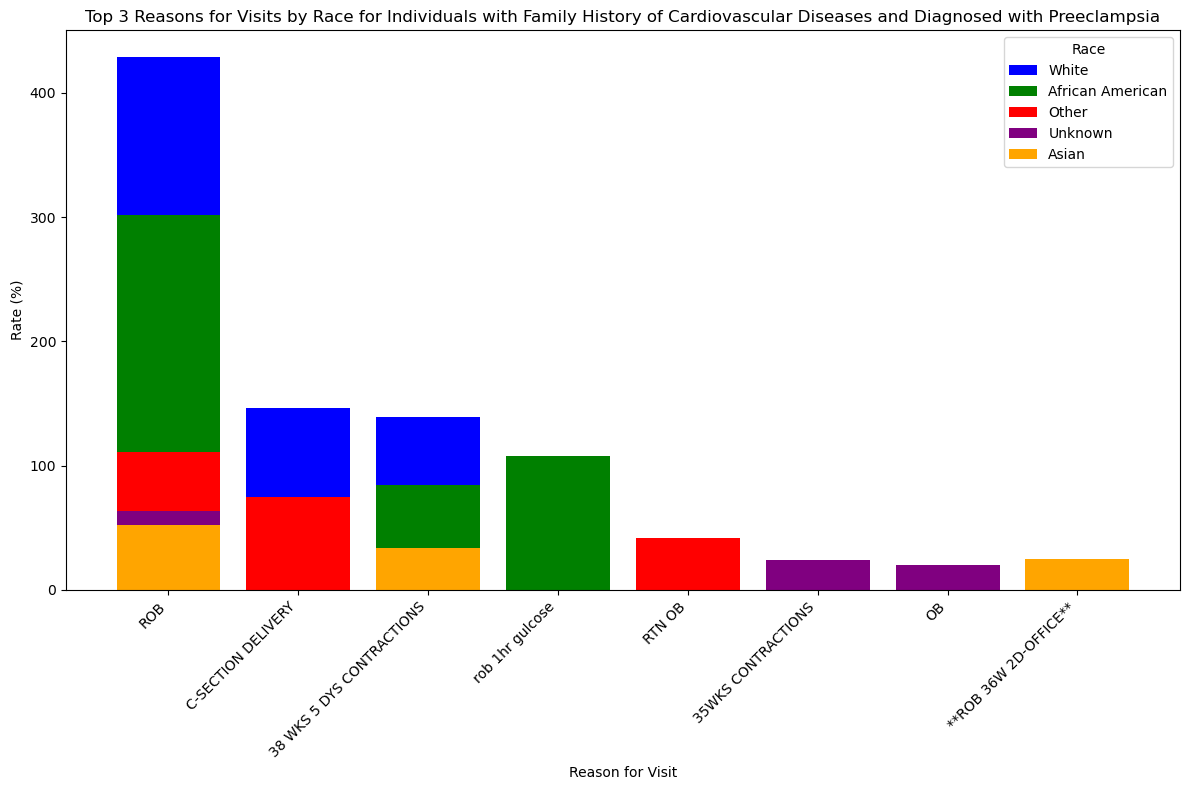

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
new_person = pd.read_csv('synth_New_Person.csv')
new_family_hx = pd.read_csv('synth_New_FamilyHX.csv')
visits_df = pd.read_csv('synth_New_Visits.csv')
new_diagnosis = pd.read_csv('synth_New_Diagnosis.csv')

# Define the cardiovascular diseases and preeclampsia-related conditions
cardiovascular_diseases = [
    'High blood pressure', 'Diabetes', 'Diabetes mellitus', 'Diabetes mellitus type 1',
    'Hypertension', 'Heart Attack', 'Stroke', 'Heart Disease', 'High cholesterol',
    'Hypercholesteremia', 'Hyperlipidemia'
]
preeclampsia_events = ['Preeclampsia', 'High Blood Pressure', 'Hypertension']

# Filter for individuals with a family history of cardiovascular diseases
family_hx_cardiovascular = new_family_hx[new_family_hx['CONDITION'].isin(cardiovascular_diseases)]

# Merge family history with person dataset to get race information
merged_person_familyhx = new_person.merge(family_hx_cardiovascular, on='PERSON_ID', how='inner')

# Filter for individuals diagnosed with preeclampsia-related conditions
diagnosis_preeclampsia = new_diagnosis[new_diagnosis['EVENT_DESC'].str.contains('|'.join(preeclampsia_events), case=False, na=False)]

# Merge the datasets to find individuals meeting both criteria
merged_df_preeclampsia = merged_person_familyhx.merge(diagnosis_preeclampsia, on='PERSON_ID', how='inner')

# Calculate the total number of patients by race with a family history of cardiometabolic diagnosis
preeclampsia_event_desc = merged_df_preeclampsia[['PERSON_ID', 'RACE', 'EVENT_DESC']].drop_duplicates()
total_by_race = merged_person_familyhx['RACE'].value_counts().reset_index()
total_by_race.columns = ['RACE', 'Total_Count']
preeclampsia_event_desc_counts = preeclampsia_event_desc['RACE'].value_counts().reset_index()
preeclampsia_event_desc_counts.columns = ['RACE', 'Preeclampsia_Count']
rates_by_race = pd.merge(total_by_race, preeclampsia_event_desc_counts, on='RACE', how='left')
rates_by_race['Preeclampsia_Rate'] = (rates_by_race['Preeclampsia_Count'] / rates_by_race['Total_Count']) * 100
rates_by_race = rates_by_race.fillna(0)
print(rates_by_race[['RACE', 'Total_Count', 'Preeclampsia_Count', 'Preeclampsia_Rate']])

# Merge with visits data to get reason for visit
merged_visits = visits_df.merge(merged_df_preeclampsia[['PERSON_ID', 'RACE']], on='PERSON_ID', how='inner')

# Filter the dataset for the specified races
specified_races = ['White', 'African American', 'Other', 'Unknown', 'Asian']
filtered_visits_df = merged_visits[merged_visits['RACE'].isin(specified_races)]

# Group by RACE and REASON_FOR_VISIT and count the occurrences
visit_reason_counts = filtered_visits_df.groupby(['RACE', 'REASON_FOR_VISIT']).size().reset_index(name='Count')

# Merge visit reason counts with the rates by race to get the rates
visit_reason_counts = visit_reason_counts.merge(rates_by_race[['RACE', 'Preeclampsia_Rate']], on='RACE', how='left')

# Calculate the rate for each reason for visit
visit_reason_counts['Rate'] = (visit_reason_counts['Count'] / visit_reason_counts['Preeclampsia_Rate']) * 100

# Get the top three reasons for visits for each race
top_3_reasons_per_race = visit_reason_counts.groupby('RACE').apply(lambda x: x.nlargest(3, 'Rate')).reset_index(drop=True)

# Display the table of top 3 reasons per race
print("\nTop 3 Reasons for Visits by Race:")
print(top_3_reasons_per_race)

# Create the bar graph
fig, ax = plt.subplots(figsize=(12, 8))

# Define colors for each race
colors = {
    'White': 'blue',
    'African American': 'green',
    'Other': 'red',
    'Unknown': 'purple',
    'Asian': 'orange'
}

# Plot each race's top 3 reasons for visit
for race in specified_races:
    race_data = top_3_reasons_per_race[top_3_reasons_per_race['RACE'] == race]
    ax.bar(race_data['REASON_FOR_VISIT'], race_data['Rate'], color=colors[race], label=race)

# Customize the plot
ax.set_xlabel('Reason for Visit')
ax.set_ylabel('Rate (%)')
ax.set_title('Top 3 Reasons for Visits by Race for Individuals with Family History of Cardiovascular Diseases and Diagnosed with Preeclampsia')
ax.legend(title='Race')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

                                   RACE  Total_Count  Preeclampsia_Count  \
0                                 White         4699                2597   
1                      African American         2924                1733   
2                                 Other         1718                 991   
3                               Unknown          527                 289   
4                                 Asian          512                 306   
5                              Multiple          131                  73   
6                    Declined to Answer           54                  43   
7      American Indian or Alaska Native           38                  16   
8                      Hispanic/Spanish           19                  13   
9   Native Hawaiian or Pacific Islander           15                  11   
10                         Non Hispanic           12                   5   

    Preeclampsia_Rate  
0           55.267078  
1           59.268126  
2           57.

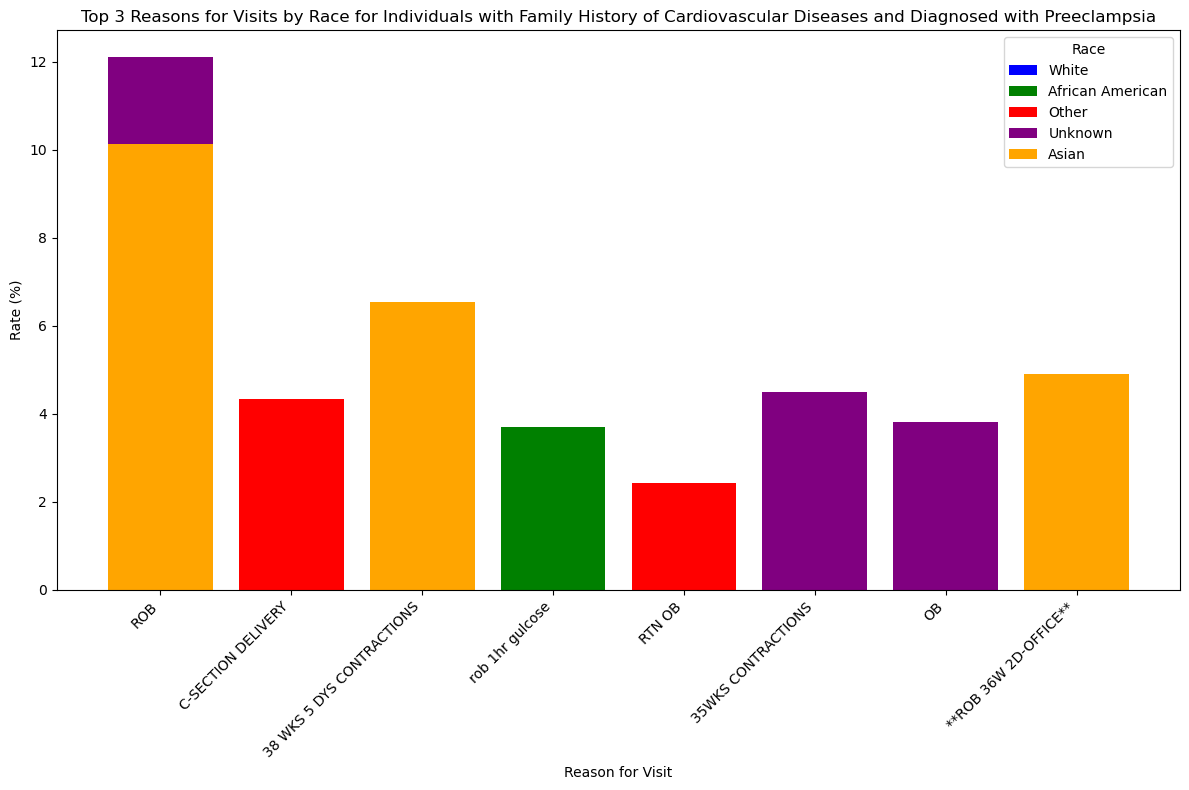

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
new_person = pd.read_csv('synth_New_Person.csv')
new_family_hx = pd.read_csv('synth_New_FamilyHX.csv')
visits_df = pd.read_csv('synth_New_Visits.csv')
new_diagnosis = pd.read_csv('synth_New_Diagnosis.csv')

# Define the cardiovascular diseases and preeclampsia-related conditions
cardiovascular_diseases = [
    'High blood pressure', 'Diabetes', 'Diabetes mellitus', 'Diabetes mellitus type 1',
    'Hypertension', 'Heart Attack', 'Stroke', 'Heart Disease', 'High cholesterol',
    'Hypercholesteremia', 'Hyperlipidemia'
]
preeclampsia_events = ['Preeclampsia', 'High Blood Pressure', 'Hypertension']

# Filter for individuals with a family history of cardiovascular diseases
family_hx_cardiovascular = new_family_hx[new_family_hx['CONDITION'].isin(cardiovascular_diseases)]

# Merge family history with person dataset to get race information
merged_person_familyhx = new_person.merge(family_hx_cardiovascular, on='PERSON_ID', how='inner')

# Filter for individuals diagnosed with preeclampsia-related conditions
diagnosis_preeclampsia = new_diagnosis[new_diagnosis['EVENT_DESC'].str.contains('|'.join(preeclampsia_events), case=False, na=False)]

# Merge the datasets to find individuals meeting both criteria
merged_df_preeclampsia = merged_person_familyhx.merge(diagnosis_preeclampsia, on='PERSON_ID', how='inner')

# Calculate the total number of patients by race with a family history of cardiometabolic diagnosis
preeclampsia_event_desc = merged_df_preeclampsia[['PERSON_ID', 'RACE', 'EVENT_DESC']].drop_duplicates()
total_by_race = merged_person_familyhx['RACE'].value_counts().reset_index()
total_by_race.columns = ['RACE', 'Total_Count']
preeclampsia_event_desc_counts = preeclampsia_event_desc['RACE'].value_counts().reset_index()
preeclampsia_event_desc_counts.columns = ['RACE', 'Preeclampsia_Count']
rates_by_race = pd.merge(total_by_race, preeclampsia_event_desc_counts, on='RACE', how='left')
rates_by_race['Preeclampsia_Rate'] = (rates_by_race['Preeclampsia_Count'] / rates_by_race['Total_Count']) * 100
rates_by_race = rates_by_race.fillna(0)
print(rates_by_race[['RACE', 'Total_Count', 'Preeclampsia_Count', 'Preeclampsia_Rate']])

# Merge with visits data to get reason for visit
merged_visits = visits_df.merge(merged_df_preeclampsia[['PERSON_ID', 'RACE']], on='PERSON_ID', how='inner')

# Filter the dataset for the specified races
specified_races = ['White', 'African American', 'Other', 'Unknown', 'Asian']
filtered_visits_df = merged_visits[merged_visits['RACE'].isin(specified_races)]

# Group by RACE and REASON_FOR_VISIT and count the occurrences
visit_reason_counts = filtered_visits_df.groupby(['RACE', 'REASON_FOR_VISIT']).size().reset_index(name='Count')

# Merge visit reason counts with the rates by race to get the rates
visit_reason_counts = visit_reason_counts.merge(rates_by_race[['RACE', 'Preeclampsia_Count']], on='RACE', how='left')

# Calculate the rate for each reason for visit
visit_reason_counts['Rate'] = (visit_reason_counts['Count'] / visit_reason_counts['Preeclampsia_Count']) * 100

# Get the top three reasons for visits for each race
top_3_reasons_per_race = visit_reason_counts.groupby('RACE').apply(lambda x: x.nlargest(3, 'Rate')).reset_index(drop=True)

# Display the table of top 3 reasons per race
print("\nTop 3 Reasons for Visits by Race:")
print(top_3_reasons_per_race)

# Create the bar graph
fig, ax = plt.subplots(figsize=(12, 8))

# Define colors for each race
colors = {
    'White': 'blue',
    'African American': 'green',
    'Other': 'red',
    'Unknown': 'purple',
    'Asian': 'orange'
}

# Plot each race's top 3 reasons for visit
for race in specified_races:
    race_data = top_3_reasons_per_race[top_3_reasons_per_race['RACE'] == race]
    ax.bar(race_data['REASON_FOR_VISIT'], race_data['Rate'], color=colors[race], label=race)

# Customize the plot
ax.set_xlabel('Reason for Visit')
ax.set_ylabel('Rate (%)')
ax.set_title('Top 3 Reasons for Visits by Race for Individuals with Family History of Cardiovascular Diseases and Diagnosed with Preeclampsia')
ax.legend(title='Race')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

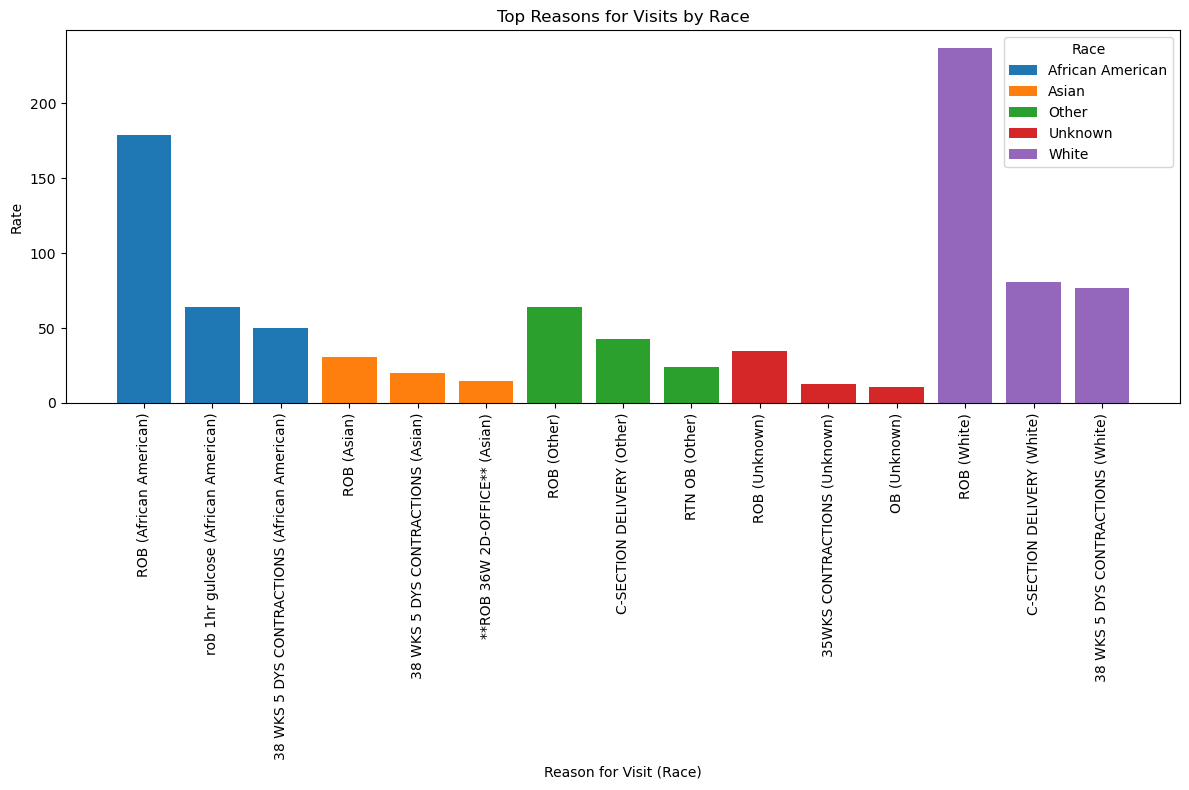

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Create the DataFrame from the provided data
data = {
    'RACE': ['African American', 'African American', 'African American',
             'Asian', 'Asian', 'Asian',
             'Other', 'Other', 'Other',
             'Unknown', 'Unknown', 'Unknown',
             'White', 'White', 'White'],
    'REASON_FOR_VISIT': ['ROB', 'rob 1hr gulcose', '38 WKS 5 DYS CONTRACTIONS',
                         'ROB', '38 WKS 5 DYS CONTRACTIONS', '**ROB 36W 2D-OFFICE**',
                         'ROB', 'C-SECTION DELIVERY', 'RTN OB',
                         'ROB', '35WKS CONTRACTIONS', 'OB',
                         'ROB', 'C-SECTION DELIVERY', '38 WKS 5 DYS CONTRACTIONS'],
    'Count': [179, 64, 50, 31, 20, 15, 64, 43, 24, 35, 13, 11, 237, 81, 77],
    'Preeclampsia_Count': [1733, 1733, 1733, 306, 306, 306, 991, 991, 991, 289, 289, 289, 2597, 2597, 2597],
    'Rate': [10.328909, 3.693018, 2.885170, 10.130719, 6.535948, 4.901961,
             6.458123, 4.339051, 2.421796, 12.110727, 4.498270, 3.806228,
             9.125915, 3.118983, 2.964960]
}

df = pd.DataFrame(data)

# Set the figure size
plt.figure(figsize=(12, 8))

# Create a bar plot
for race in df['RACE'].unique():
    subset = df[df['RACE'] == race]
    plt.bar(subset['REASON_FOR_VISIT'] + ' (' + race + ')', subset['Count'], label=race)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Set titles and labels
plt.title('Top Reasons for Visits by Race')
plt.xlabel('Reason for Visit (Race)')
plt.ylabel('Rate')
plt.legend(title='Race')

# Show the plot
plt.tight_layout()
plt.show()

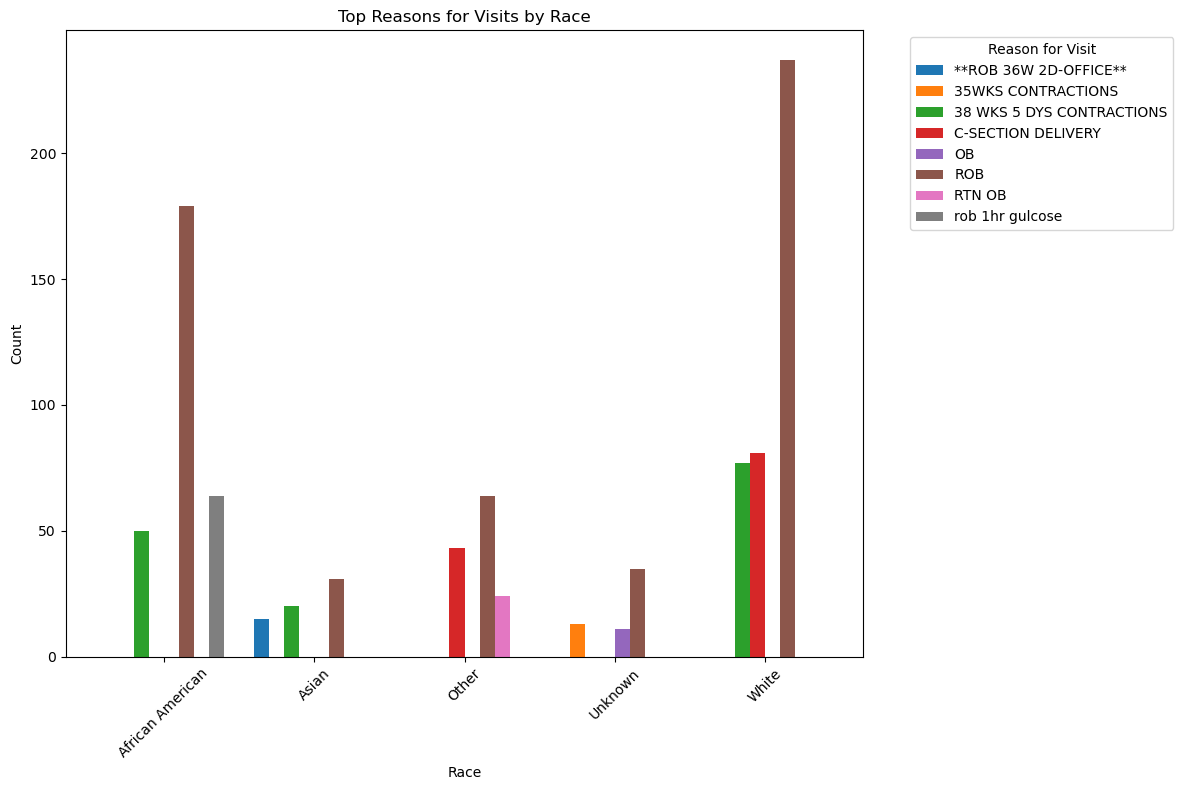

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Create the DataFrame from the provided data
data = {
    'RACE': ['African American', 'African American', 'African American',
             'Asian', 'Asian', 'Asian',
             'Other', 'Other', 'Other',
             'Unknown', 'Unknown', 'Unknown',
             'White', 'White', 'White'],
    'REASON_FOR_VISIT': ['ROB', 'rob 1hr gulcose', '38 WKS 5 DYS CONTRACTIONS',
                         'ROB', '38 WKS 5 DYS CONTRACTIONS', '**ROB 36W 2D-OFFICE**',
                         'ROB', 'C-SECTION DELIVERY', 'RTN OB',
                         'ROB', '35WKS CONTRACTIONS', 'OB',
                         'ROB', 'C-SECTION DELIVERY', '38 WKS 5 DYS CONTRACTIONS'],
    'Count': [179, 64, 50, 31, 20, 15, 64, 43, 24, 35, 13, 11, 237, 81, 77]
}

df = pd.DataFrame(data)

# Pivot the DataFrame to have RACE as rows and REASON_FOR_VISIT as columns
pivot_df = df.pivot_table(index='RACE', columns='REASON_FOR_VISIT', values='Count', aggfunc='sum', fill_value=0)

# Plot the grouped bar chart
ax = pivot_df.plot(kind='bar', figsize=(12, 8), width=0.8)

# Set titles and labels
plt.title('Top Reasons for Visits by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Reason for Visit', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()



                                   RACE  Total_Count  Preeclampsia_Count  \
0                                 White         4699                2597   
1                      African American         2924                1733   
2                                 Other         1718                 991   
3                               Unknown          527                 289   
4                                 Asian          512                 306   
5                              Multiple          131                  73   
6                    Declined to Answer           54                  43   
7      American Indian or Alaska Native           38                  16   
8                      Hispanic/Spanish           19                  13   
9   Native Hawaiian or Pacific Islander           15                  11   
10                         Non Hispanic           12                   5   

    Preeclampsia_Rate  
0           55.267078  
1           59.268126  
2           57.

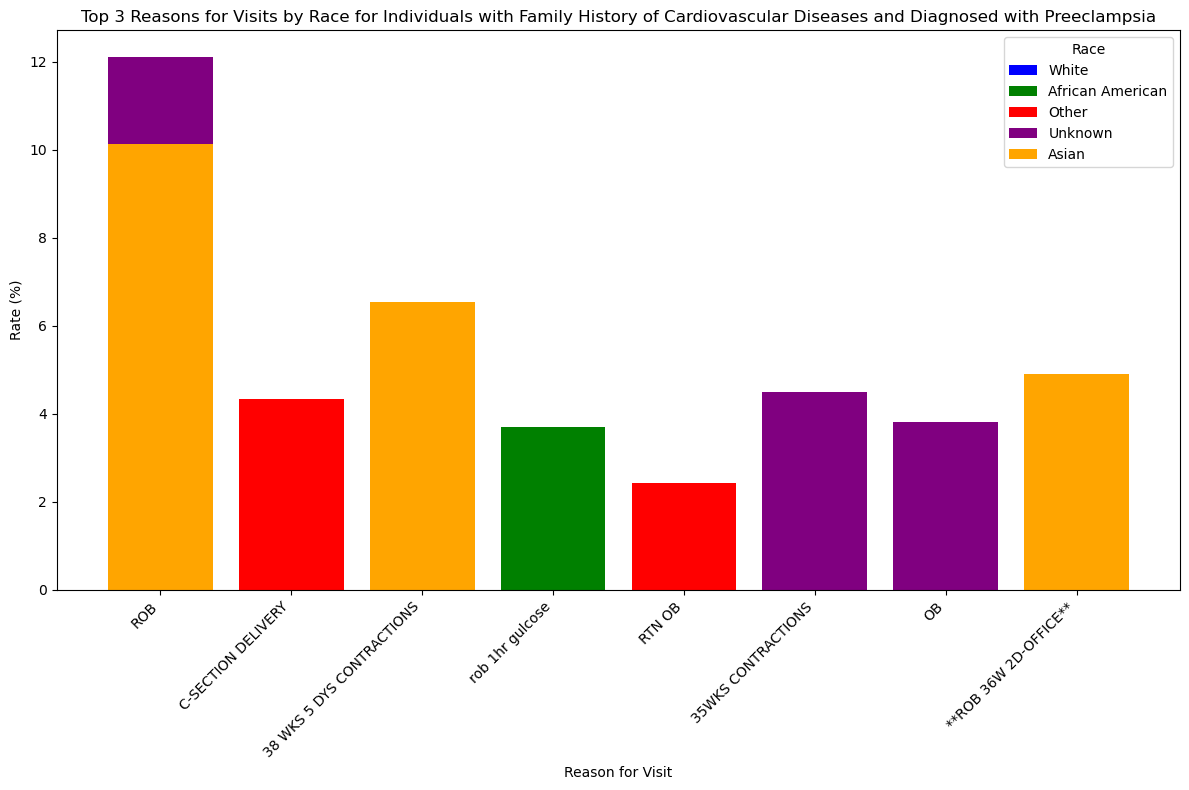

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
new_person = pd.read_csv('synth_New_Person.csv')
new_family_hx = pd.read_csv('synth_New_FamilyHX.csv')
visits_df = pd.read_csv('synth_New_Visits.csv')
new_diagnosis = pd.read_csv('synth_New_Diagnosis.csv')

# Define the cardiovascular diseases and preeclampsia-related conditions
cardiovascular_diseases = [
    'High blood pressure', 'Diabetes', 'Diabetes mellitus', 'Diabetes mellitus type 1',
    'Hypertension', 'Heart Attack', 'Stroke', 'Heart Disease', 'High cholesterol',
    'Hypercholesteremia', 'Hyperlipidemia'
]
preeclampsia_events = ['Preeclampsia', 'High Blood Pressure', 'Hypertension']

# Filter for individuals with a family history of cardiovascular diseases
family_hx_cardiovascular = new_family_hx[new_family_hx['CONDITION'].isin(cardiovascular_diseases)]

# Merge family history with person dataset to get race information
merged_person_familyhx = new_person.merge(family_hx_cardiovascular, on='PERSON_ID', how='inner')

# Filter for individuals diagnosed with preeclampsia-related conditions
diagnosis_preeclampsia = new_diagnosis[new_diagnosis['EVENT_DESC'].str.contains('|'.join(preeclampsia_events), case=False, na=False)]

# Merge the datasets to find individuals meeting both criteria
merged_df_preeclampsia = merged_person_familyhx.merge(diagnosis_preeclampsia, on='PERSON_ID', how='inner')

# Calculate the total number of patients by race with a family history of cardiometabolic diagnosis
preeclampsia_event_desc = merged_df_preeclampsia[['PERSON_ID', 'RACE', 'EVENT_DESC']].drop_duplicates()
total_by_race = merged_person_familyhx['RACE'].value_counts().reset_index()
total_by_race.columns = ['RACE', 'Total_Count']
preeclampsia_event_desc_counts = preeclampsia_event_desc['RACE'].value_counts().reset_index()
preeclampsia_event_desc_counts.columns = ['RACE', 'Preeclampsia_Count']
rates_by_race = pd.merge(total_by_race, preeclampsia_event_desc_counts, on='RACE', how='left')
rates_by_race['Preeclampsia_Rate'] = (rates_by_race['Preeclampsia_Count'] / rates_by_race['Total_Count']) * 100
rates_by_race = rates_by_race.fillna(0)
print(rates_by_race[['RACE', 'Total_Count', 'Preeclampsia_Count', 'Preeclampsia_Rate']])

# Merge with visits data to get reason for visit
merged_visits = visits_df.merge(merged_df_preeclampsia[['PERSON_ID', 'RACE']], on='PERSON_ID', how='inner')

# Filter the dataset for the specified races
specified_races = ['White', 'African American', 'Other', 'Unknown', 'Asian']
filtered_visits_df = merged_visits[merged_visits['RACE'].isin(specified_races)]

# Group by RACE and REASON_FOR_VISIT and count the occurrences
visit_reason_counts = filtered_visits_df.groupby(['RACE', 'REASON_FOR_VISIT']).size().reset_index(name='Count')

# Merge visit reason counts with the rates by race to get the rates
visit_reason_counts = visit_reason_counts.merge(rates_by_race[['RACE', 'Preeclampsia_Count']], on='RACE', how='left')

# Calculate the rate for each reason for visit
visit_reason_counts['Rate'] = (visit_reason_counts['Count'] / visit_reason_counts['Preeclampsia_Count']) * 100

# Get the top three reasons for visits for each race
top_3_reasons_per_race = visit_reason_counts.groupby('RACE').apply(lambda x: x.nlargest(3, 'Rate')).reset_index(drop=True)

# Display the table of top 3 reasons per race
print("\nTop 3 Reasons for Visits by Race:")
print(top_3_reasons_per_race)

# Create the bar graph
fig, ax = plt.subplots(figsize=(12, 8))

# Define colors for each race
colors = {
    'White': 'blue',
    'African American': 'green',
    'Other': 'red',
    'Unknown': 'purple',
    'Asian': 'orange'
}

# Plot each race's top 3 reasons for visit
for race in specified_races:
    race_data = top_3_reasons_per_race[top_3_reasons_per_race['RACE'] == race]
    ax.bar(race_data['REASON_FOR_VISIT'], race_data['Rate'], color=colors[race], label=race)

# Customize the plot
ax.set_xlabel('Reason for Visit')
ax.set_ylabel('Rate (%)')
ax.set_title('Top 3 Reasons for Visits by Race for Individuals with Family History of Cardiovascular Diseases and Diagnosed with Preeclampsia')
ax.legend(title='Race')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

  AGE_GROUP  Total_Count  Preeclampsia_Count  Preeclampsia_Rate
0     25-34         7955                4555          57.259585
1     35-44         2000                1110          55.500000
2     18-24          694                 412          59.365994

Top 3 Reasons for Visits by Age Group:
  AGE_GROUP           REASON_FOR_VISIT  Count  Preeclampsia_Count       Rate
0     18-24                        ROB     21                 412   5.097087
1     18-24            rob 1hr gulcose     19                 412   4.611650
2     18-24                  33WKS HBP     17                 412   4.126214
3     25-34                        ROB    407                4555   8.935236
4     25-34            rob 1hr gulcose    127                4555   2.788145
5     25-34         C-SECTION DELIVERY    125                4555   2.744237
6     35-44                        ROB    121                1110  10.900901
7     35-44         C-SECTION DELIVERY     49                1110   4.414414
8     35-44

/var/folders/c7/mwgyyxds33bg8rksxm07_r_00000gn/T/ipykernel_80176/498871248.py:65: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(age_groups))


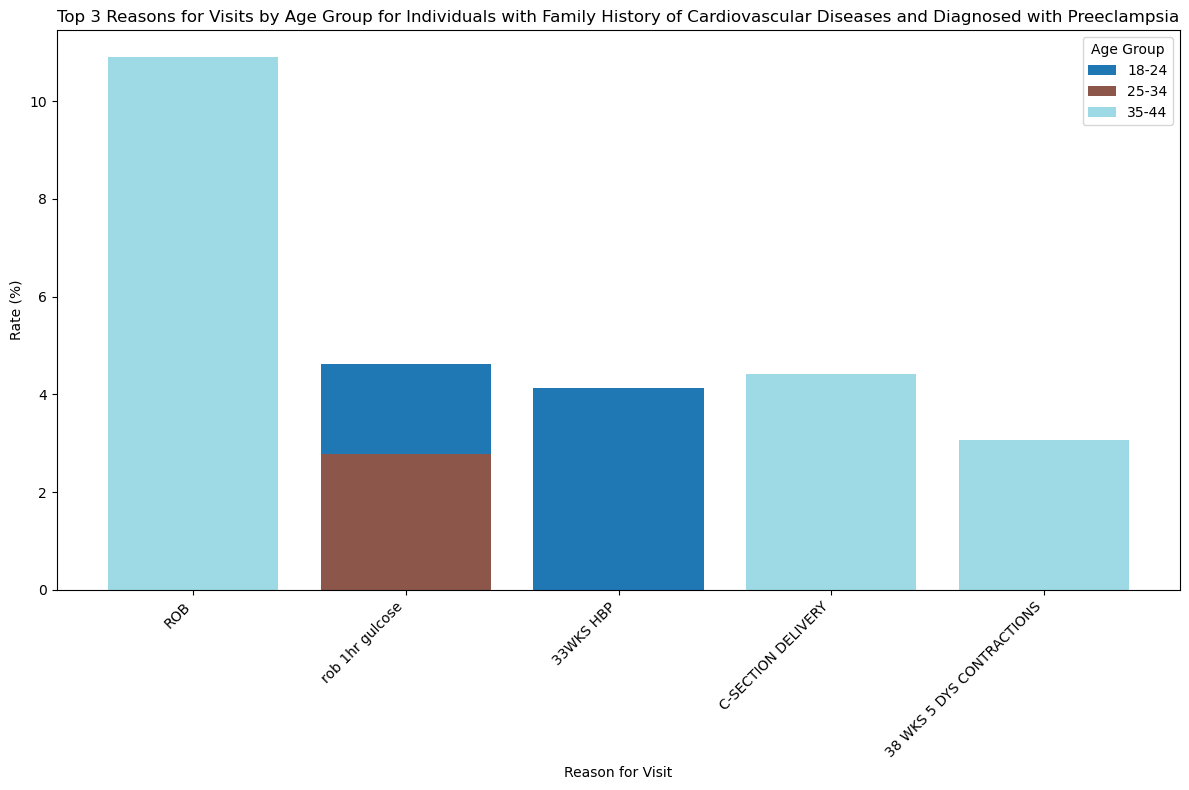

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
new_person = pd.read_csv('synth_New_Person.csv')
new_family_hx = pd.read_csv('synth_New_FamilyHX.csv')
visits_df = pd.read_csv('synth_New_Visits.csv')
new_diagnosis = pd.read_csv('synth_New_Diagnosis.csv')

# Define the cardiovascular diseases and preeclampsia-related conditions
cardiovascular_diseases = [
    'High blood pressure', 'Diabetes', 'Diabetes mellitus', 'Diabetes mellitus type 1',
    'Hypertension', 'Heart Attack', 'Stroke', 'Heart Disease', 'High cholesterol',
    'Hypercholesteremia', 'Hyperlipidemia'
]
preeclampsia_events = ['Preeclampsia', 'High Blood Pressure', 'Hypertension']

# Filter for individuals with a family history of cardiovascular diseases
family_hx_cardiovascular = new_family_hx[new_family_hx['CONDITION'].isin(cardiovascular_diseases)]

# Merge family history with person dataset to get age group information
merged_person_familyhx = new_person.merge(family_hx_cardiovascular, on='PERSON_ID', how='inner')

# Filter for individuals diagnosed with preeclampsia-related conditions
diagnosis_preeclampsia = new_diagnosis[new_diagnosis['EVENT_DESC'].str.contains('|'.join(preeclampsia_events), case=False, na=False)]

# Merge the datasets to find individuals meeting both criteria
merged_df_preeclampsia = merged_person_familyhx.merge(diagnosis_preeclampsia, on='PERSON_ID', how='inner')

# Calculate the total number of patients by age group with a family history of cardiometabolic diagnosis
preeclampsia_event_desc = merged_df_preeclampsia[['PERSON_ID', 'AGE_GROUP', 'EVENT_DESC']].drop_duplicates()
total_by_age_group = merged_person_familyhx['AGE_GROUP'].value_counts().reset_index()
total_by_age_group.columns = ['AGE_GROUP', 'Total_Count']
preeclampsia_event_desc_counts = preeclampsia_event_desc['AGE_GROUP'].value_counts().reset_index()
preeclampsia_event_desc_counts.columns = ['AGE_GROUP', 'Preeclampsia_Count']
rates_by_age_group = pd.merge(total_by_age_group, preeclampsia_event_desc_counts, on='AGE_GROUP', how='left')
rates_by_age_group['Preeclampsia_Rate'] = (rates_by_age_group['Preeclampsia_Count'] / rates_by_age_group['Total_Count']) * 100
rates_by_age_group = rates_by_age_group.fillna(0)
print(rates_by_age_group[['AGE_GROUP', 'Total_Count', 'Preeclampsia_Count', 'Preeclampsia_Rate']])

# Merge with visits data to get reason for visit
merged_visits = visits_df.merge(merged_df_preeclampsia[['PERSON_ID', 'AGE_GROUP']], on='PERSON_ID', how='inner')

# Group by AGE_GROUP and REASON_FOR_VISIT and count the occurrences
visit_reason_counts = merged_visits.groupby(['AGE_GROUP', 'REASON_FOR_VISIT']).size().reset_index(name='Count')

# Merge visit reason counts with the rates by age group to get the rates
visit_reason_counts = visit_reason_counts.merge(rates_by_age_group[['AGE_GROUP', 'Preeclampsia_Count']], on='AGE_GROUP', how='left')

# Calculate the rate for each reason for visit
visit_reason_counts['Rate'] = (visit_reason_counts['Count'] / visit_reason_counts['Preeclampsia_Count']) * 100

# Get the top three reasons for visits for each age group
top_3_reasons_per_age_group = visit_reason_counts.groupby('AGE_GROUP').apply(lambda x: x.nlargest(3, 'Rate')).reset_index(drop=True)

# Display the table of top 3 reasons per age group
print("\nTop 3 Reasons for Visits by Age Group:")
print(top_3_reasons_per_age_group)

# Create the bar graph
fig, ax = plt.subplots(figsize=(12, 8))

# Define colors for each age group
age_groups = top_3_reasons_per_age_group['AGE_GROUP'].unique()
colors = plt.cm.get_cmap('tab20', len(age_groups))

# Plot each age group's top 3 reasons for visit
for idx, age_group in enumerate(age_groups):
    age_group_data = top_3_reasons_per_age_group[top_3_reasons_per_age_group['AGE_GROUP'] == age_group]
    ax.bar(age_group_data['REASON_FOR_VISIT'], age_group_data['Rate'], color=colors(idx), label=age_group)

# Customize the plot
ax.set_xlabel('Reason for Visit')
ax.set_ylabel('Rate (%)')
ax.set_title('Top 3 Reasons for Visits by Age Group for Individuals with Family History of Cardiovascular Diseases and Diagnosed with Preeclampsia')
ax.legend(title='Age Group')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


                                   RACE AGE_GROUP  Total_Count  \
0                      African American     18-24          227   
1                      African American     25-34         2310   
2                      African American     35-44          387   
3      American Indian or Alaska Native     18-24            1   
4      American Indian or Alaska Native     25-34           31   
5      American Indian or Alaska Native     35-44            6   
6                                 Asian     18-24           36   
7                                 Asian     25-34          377   
8                                 Asian     35-44           99   
9                    Declined to Answer     18-24            6   
10                   Declined to Answer     25-34           41   
11                   Declined to Answer     35-44            7   
12                     Hispanic/Spanish     25-34           12   
13                     Hispanic/Spanish     35-44            7   
14        

/var/folders/c7/mwgyyxds33bg8rksxm07_r_00000gn/T/ipykernel_92947/579161745.py:66: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(top_3_reasons_per_race_age_group['RACE'].unique()))


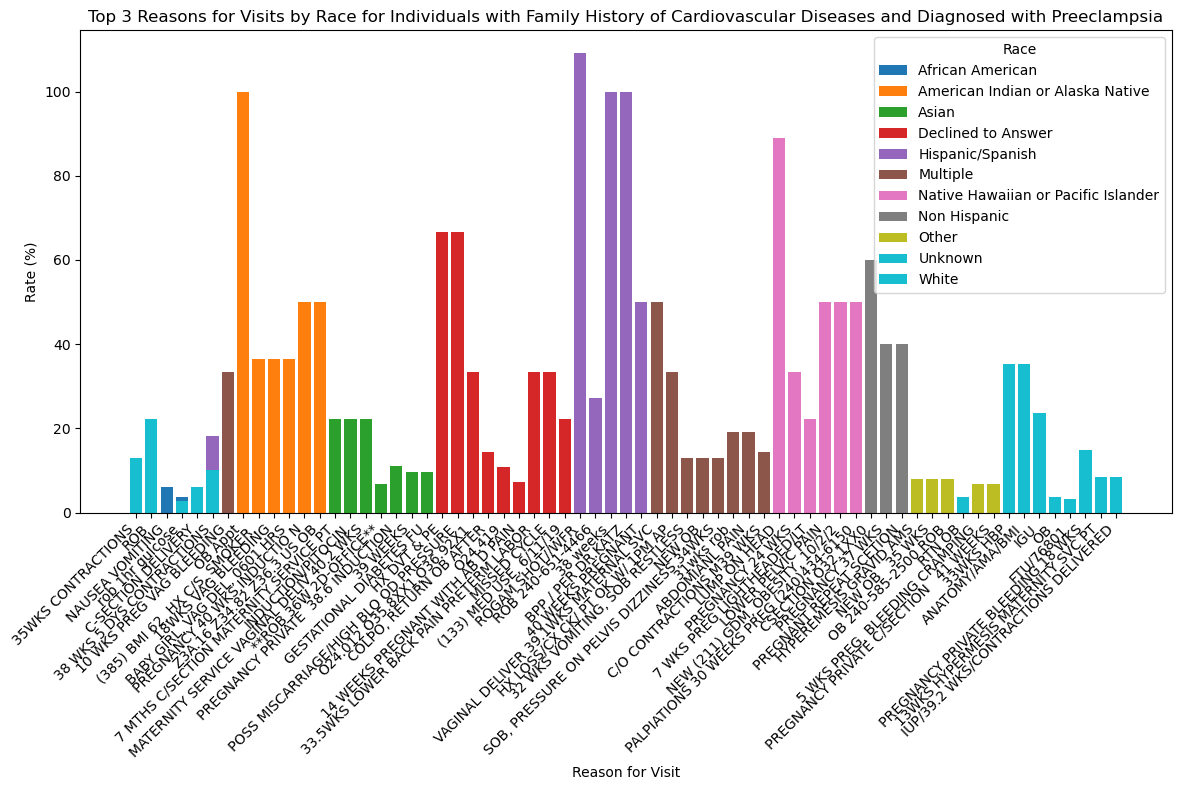

/var/folders/c7/mwgyyxds33bg8rksxm07_r_00000gn/T/ipykernel_92947/579161745.py:88: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(top_3_reasons_per_race_age_group['AGE_GROUP'].unique()))


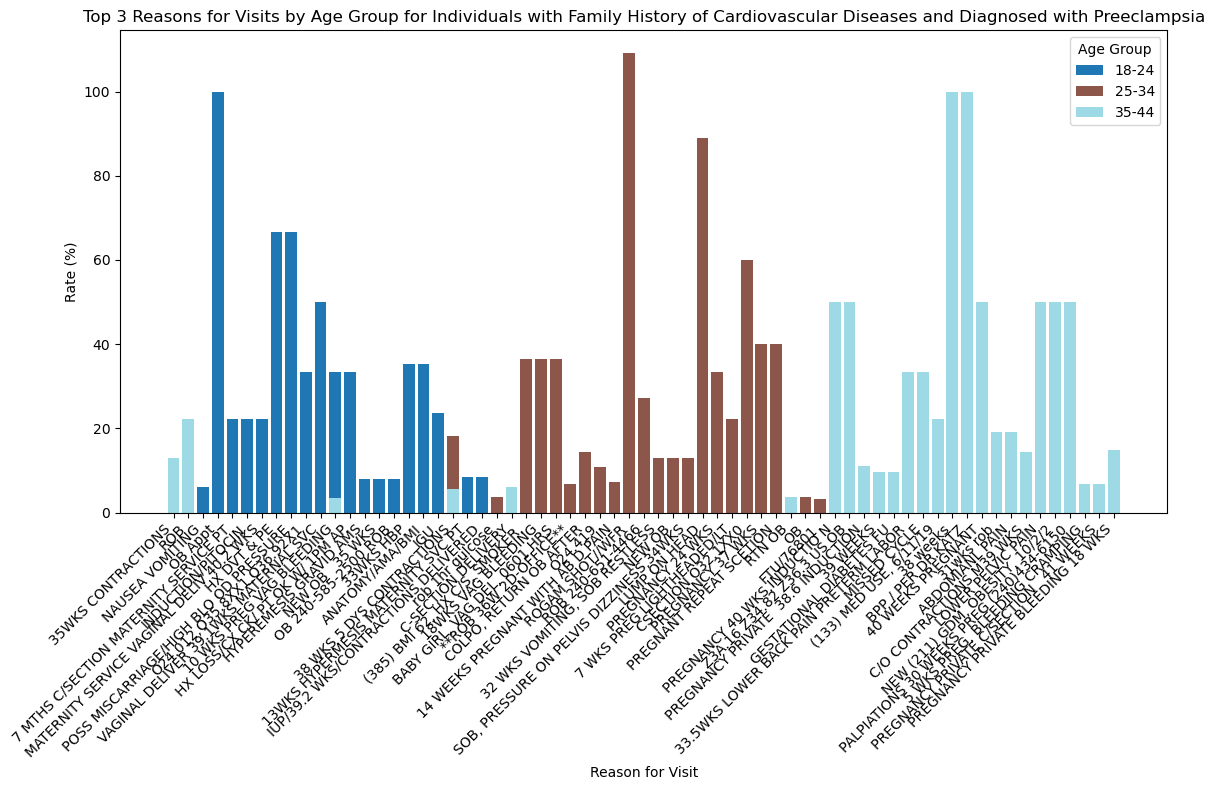

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
new_person = pd.read_csv('synth_New_Person.csv')
new_family_hx = pd.read_csv('synth_New_FamilyHX.csv')
visits_df = pd.read_csv('synth_New_Visits.csv')
new_diagnosis = pd.read_csv('synth_New_Diagnosis.csv')

# Define the cardiovascular diseases and preeclampsia-related conditions
cardiovascular_diseases = [
    'High blood pressure', 'Diabetes', 'Diabetes mellitus', 'Diabetes mellitus type 1',
    'Hypertension', 'Heart Attack', 'Stroke', 'Heart Disease', 'High cholesterol',
    'Hypercholesteremia', 'Hyperlipidemia'
]
preeclampsia_events = ['Preeclampsia', 'High Blood Pressure', 'Hypertension']

# Filter for individuals with a family history of cardiovascular diseases
family_hx_cardiovascular = new_family_hx[new_family_hx['CONDITION'].isin(cardiovascular_diseases)]

# Merge family history with person dataset to get race and age group information
merged_person_familyhx = new_person.merge(family_hx_cardiovascular, on='PERSON_ID', how='inner')

# Filter for individuals diagnosed with preeclampsia-related conditions
diagnosis_preeclampsia = new_diagnosis[new_diagnosis['EVENT_DESC'].str.contains('|'.join(preeclampsia_events), case=False, na=False)]

# Merge the datasets to find individuals meeting both criteria
merged_df_preeclampsia = merged_person_familyhx.merge(diagnosis_preeclampsia, on='PERSON_ID', how='inner')

# Calculate the total number of patients by race and age group with a family history of cardiometabolic diagnosis
preeclampsia_event_desc = merged_df_preeclampsia[['PERSON_ID', 'RACE', 'AGE_GROUP', 'EVENT_DESC']].drop_duplicates()

# Total count by race and age group
total_by_race_age_group = merged_person_familyhx.groupby(['RACE', 'AGE_GROUP']).size().reset_index(name='Total_Count')
preeclampsia_event_desc_counts = preeclampsia_event_desc.groupby(['RACE', 'AGE_GROUP']).size().reset_index(name='Preeclampsia_Count')

# Merge the counts to calculate the rates
rates_by_race_age_group = pd.merge(total_by_race_age_group, preeclampsia_event_desc_counts, on=['RACE', 'AGE_GROUP'], how='left')
rates_by_race_age_group['Preeclampsia_Rate'] = (rates_by_race_age_group['Preeclampsia_Count'] / rates_by_race_age_group['Total_Count']) * 100
rates_by_race_age_group = rates_by_race_age_group.fillna(0)
print(rates_by_race_age_group[['RACE', 'AGE_GROUP', 'Total_Count', 'Preeclampsia_Count', 'Preeclampsia_Rate']])

# Merge with visits data to get reason for visit
merged_visits = visits_df.merge(merged_df_preeclampsia[['PERSON_ID', 'RACE', 'AGE_GROUP']], on='PERSON_ID', how='inner')

# Group by RACE, AGE_GROUP, and REASON_FOR_VISIT and count the occurrences
visit_reason_counts = merged_visits.groupby(['RACE', 'AGE_GROUP', 'REASON_FOR_VISIT']).size().reset_index(name='Count')

# Merge visit reason counts with the rates by race and age group to get the rates
visit_reason_counts = visit_reason_counts.merge(rates_by_race_age_group[['RACE', 'AGE_GROUP', 'Preeclampsia_Count']], on=['RACE', 'AGE_GROUP'], how='left')

# Calculate the rate for each reason for visit
visit_reason_counts['Rate'] = (visit_reason_counts['Count'] / visit_reason_counts['Preeclampsia_Count']) * 100

# Get the top three reasons for visits for each race and age group
top_3_reasons_per_race_age_group = visit_reason_counts.groupby(['RACE', 'AGE_GROUP']).apply(lambda x: x.nlargest(3, 'Rate')).reset_index(drop=True)

# Display the table of top 3 reasons per race and age group
print("\nTop 3 Reasons for Visits by Race and Age Group:")
print(top_3_reasons_per_race_age_group)

# Create the bar graph for race
fig, ax = plt.subplots(figsize=(12, 8))

# Define colors for each race
colors = plt.cm.get_cmap('tab10', len(top_3_reasons_per_race_age_group['RACE'].unique()))

# Plot each race's top 3 reasons for visit
for idx, race in enumerate(top_3_reasons_per_race_age_group['RACE'].unique()):
    race_data = top_3_reasons_per_race_age_group[top_3_reasons_per_race_age_group['RACE'] == race]
    ax.bar(race_data['REASON_FOR_VISIT'], race_data['Rate'], color=colors(idx), label=race)

# Customize the plot
ax.set_xlabel('Reason for Visit')
ax.set_ylabel('Rate (%)')
ax.set_title('Top 3 Reasons for Visits by Race for Individuals with Family History of Cardiovascular Diseases and Diagnosed with Preeclampsia')
ax.legend(title='Race')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

# Create the bar graph for age group
fig, ax = plt.subplots(figsize=(12, 8))

# Define colors for each age group
colors = plt.cm.get_cmap('tab20', len(top_3_reasons_per_race_age_group['AGE_GROUP'].unique()))

# Plot each age group's top 3 reasons for visit
for idx, age_group in enumerate(top_3_reasons_per_race_age_group['AGE_GROUP'].unique()):
    age_group_data = top_3_reasons_per_race_age_group[top_3_reasons_per_race_age_group['AGE_GROUP'] == age_group]
    ax.bar(age_group_data['REASON_FOR_VISIT'], age_group_data['Rate'], color=colors(idx), label=age_group)

# Customize the plot
ax.set_xlabel('Reason for Visit')
ax.set_ylabel('Rate (%)')
ax.set_title('Top 3 Reasons for Visits by Age Group for Individuals with Family History of Cardiovascular Diseases and Diagnosed with Preeclampsia')
ax.legend(title='Age Group')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

                                   RACE AGE_GROUP  Total_Count  \
0                      African American     18-24          227   
1                      African American     25-34         2310   
2                      African American     35-44          387   
3      American Indian or Alaska Native     18-24            1   
4      American Indian or Alaska Native     25-34           31   
5      American Indian or Alaska Native     35-44            6   
6                                 Asian     18-24           36   
7                                 Asian     25-34          377   
8                                 Asian     35-44           99   
9                    Declined to Answer     18-24            6   
10                   Declined to Answer     25-34           41   
11                   Declined to Answer     35-44            7   
12                     Hispanic/Spanish     25-34           12   
13                     Hispanic/Spanish     35-44            7   
14        

/var/folders/c7/mwgyyxds33bg8rksxm07_r_00000gn/T/ipykernel_92947/1653077701.py:66: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(top_3_reasons_per_race_age_group['RACE'].unique()))


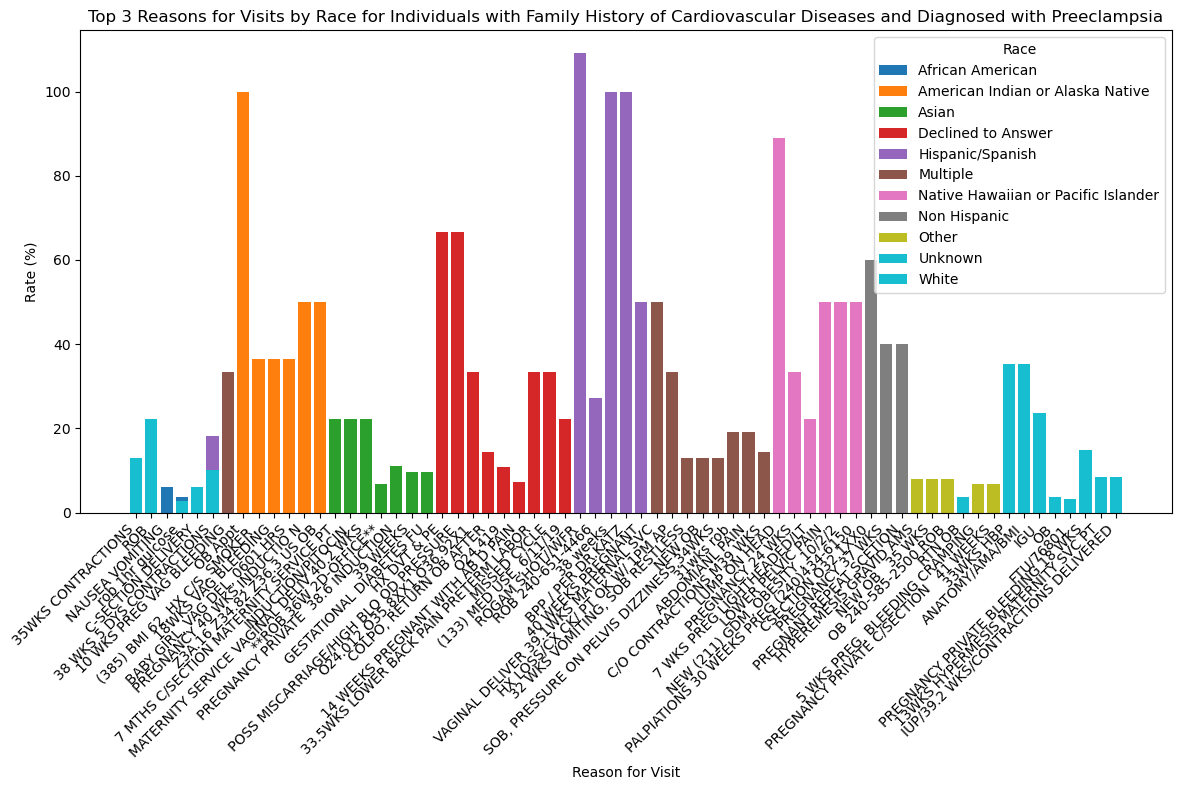

/var/folders/c7/mwgyyxds33bg8rksxm07_r_00000gn/T/ipykernel_92947/1653077701.py:88: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(top_3_reasons_per_race_age_group['AGE_GROUP'].unique()))


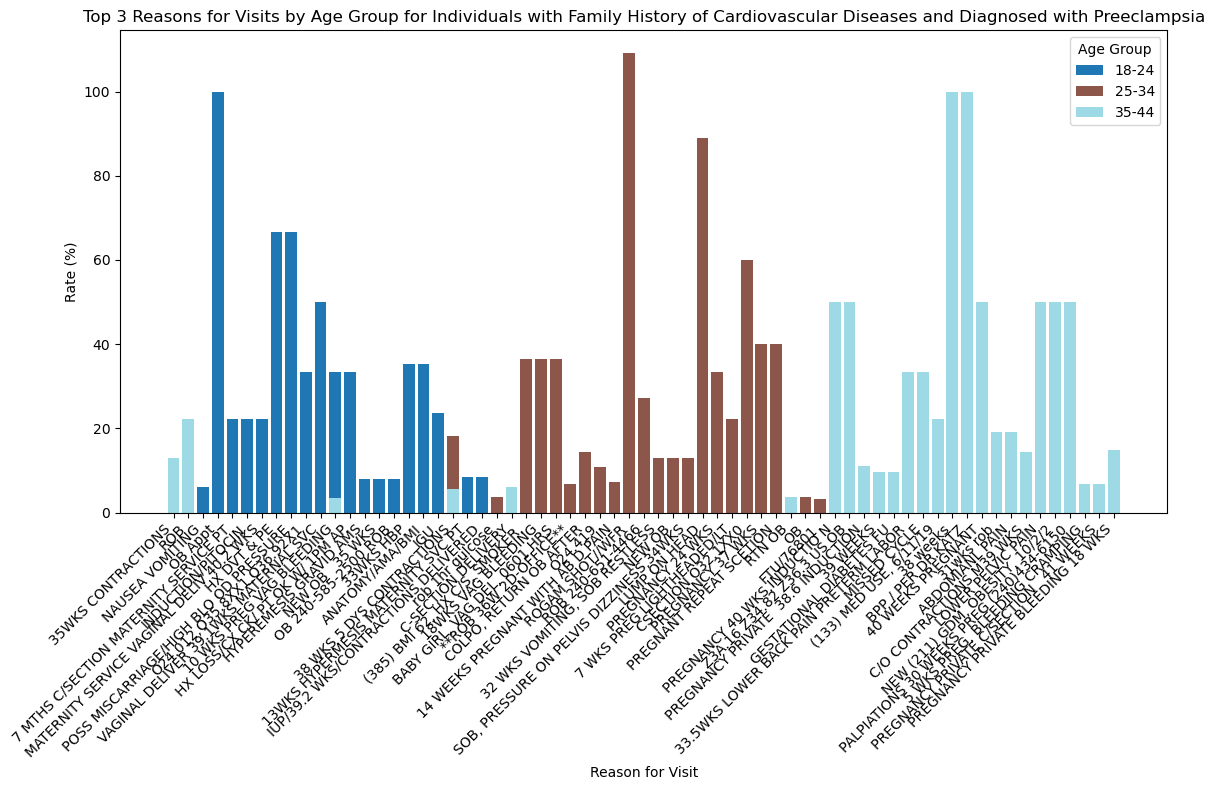

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
new_person = pd.read_csv('synth_New_Person.csv')
new_family_hx = pd.read_csv('synth_New_FamilyHX.csv')
visits_df = pd.read_csv('synth_New_Visits.csv')
new_diagnosis = pd.read_csv('synth_New_Diagnosis.csv')

# Define the cardiovascular diseases and preeclampsia-related conditions
cardiovascular_diseases = [
    'High blood pressure', 'Diabetes', 'Diabetes mellitus', 'Diabetes mellitus type 1',
    'Hypertension', 'Heart Attack', 'Stroke', 'Heart Disease', 'High cholesterol',
    'Hypercholesteremia', 'Hyperlipidemia'
]
preeclampsia_events = ['Preeclampsia', 'High Blood Pressure', 'Hypertension']

# Filter for individuals with a family history of cardiovascular diseases
family_hx_cardiovascular = new_family_hx[new_family_hx['CONDITION'].isin(cardiovascular_diseases)]

# Merge family history with person dataset to get race and age group information
merged_person_familyhx = new_person.merge(family_hx_cardiovascular, on='PERSON_ID', how='inner')

# Filter for individuals diagnosed with preeclampsia-related conditions
diagnosis_preeclampsia = new_diagnosis[new_diagnosis['EVENT_DESC'].str.contains('|'.join(preeclampsia_events), case=False, na=False)]

# Merge the datasets to find individuals meeting both criteria
merged_df_preeclampsia = merged_person_familyhx.merge(diagnosis_preeclampsia, on='PERSON_ID', how='inner')

# Calculate the total number of patients by race and age group with a family history of cardiometabolic diagnosis
preeclampsia_event_desc = merged_df_preeclampsia[['PERSON_ID', 'RACE', 'AGE_GROUP', 'EVENT_DESC']].drop_duplicates()

# Total count by race and age group
total_by_race_age_group = merged_person_familyhx.groupby(['RACE', 'AGE_GROUP']).size().reset_index(name='Total_Count')
preeclampsia_event_desc_counts = preeclampsia_event_desc.groupby(['RACE', 'AGE_GROUP']).size().reset_index(name='Preeclampsia_Count')

# Merge the counts to calculate the rates
rates_by_race_age_group = pd.merge(total_by_race_age_group, preeclampsia_event_desc_counts, on=['RACE', 'AGE_GROUP'], how='left')
rates_by_race_age_group['Preeclampsia_Rate'] = (rates_by_race_age_group['Preeclampsia_Count'] / rates_by_race_age_group['Total_Count']) * 100
rates_by_race_age_group = rates_by_race_age_group.fillna(0)
print(rates_by_race_age_group[['RACE', 'AGE_GROUP', 'Total_Count', 'Preeclampsia_Count', 'Preeclampsia_Rate']])

# Merge with visits data to get reason for visit
merged_visits = visits_df.merge(merged_df_preeclampsia[['PERSON_ID', 'RACE', 'AGE_GROUP']], on='PERSON_ID', how='inner')

# Group by RACE, AGE_GROUP, and REASON_FOR_VISIT and count the occurrences
visit_reason_counts = merged_visits.groupby(['RACE', 'AGE_GROUP', 'REASON_FOR_VISIT']).size().reset_index(name='Count')

# Merge visit reason counts with the rates by race and age group to get the rates
visit_reason_counts = visit_reason_counts.merge(rates_by_race_age_group[['RACE', 'AGE_GROUP', 'Preeclampsia_Count']], on=['RACE', 'AGE_GROUP'], how='left')

# Calculate the rate for each reason for visit
visit_reason_counts['Rate'] = (visit_reason_counts['Count'] / visit_reason_counts['Preeclampsia_Count']) * 100

# Get the top three reasons for visits for each race and age group
top_3_reasons_per_race_age_group = visit_reason_counts.groupby(['RACE', 'AGE_GROUP']).apply(lambda x: x.nlargest(3, 'Rate')).reset_index(drop=True)

# Display the table of top 3 reasons per race and age group
print("\nTop 3 Reasons for Visits by Race and Age Group:")
print(top_3_reasons_per_race_age_group)

# Create the bar graph for race
fig, ax = plt.subplots(figsize=(12, 8))

# Define colors for each race
colors = plt.cm.get_cmap('tab10', len(top_3_reasons_per_race_age_group['RACE'].unique()))

# Plot each race's top 3 reasons for visit
for idx, race in enumerate(top_3_reasons_per_race_age_group['RACE'].unique()):
    race_data = top_3_reasons_per_race_age_group[top_3_reasons_per_race_age_group['RACE'] == race]
    ax.bar(race_data['REASON_FOR_VISIT'], race_data['Rate'], color=colors(idx), label=race)

# Customize the plot
ax.set_xlabel('Reason for Visit')
ax.set_ylabel('Rate (%)')
ax.set_title('Top 3 Reasons for Visits by Race for Individuals with Family History of Cardiovascular Diseases and Diagnosed with Preeclampsia')
ax.legend(title='Race')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

# Create the bar graph for age group
fig, ax = plt.subplots(figsize=(12, 8))

# Define colors for each age group
colors = plt.cm.get_cmap('tab20', len(top_3_reasons_per_race_age_group['AGE_GROUP'].unique()))

# Plot each age group's top 3 reasons for visit
for idx, age_group in enumerate(top_3_reasons_per_race_age_group['AGE_GROUP'].unique()):
    age_group_data = top_3_reasons_per_race_age_group[top_3_reasons_per_race_age_group['AGE_GROUP'] == age_group]
    ax.bar(age_group_data['REASON_FOR_VISIT'], age_group_data['Rate'], color=colors(idx), label=age_group)

# Customize the plot
ax.set_xlabel('Reason for Visit')
ax.set_ylabel('Rate (%)')
ax.set_title('Top 3 Reasons for Visits by Age Group for Individuals with Family History of Cardiovascular Diseases and Diagnosed with Preeclampsia')
ax.legend(title='Age Group')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


                RACE AGE_GROUP  Total_Count  Preeclampsia_Count  \
0   African American     18-24          227                 132   
1   African American     25-34         2310                1372   
2   African American     35-44          387                 229   
3              Asian     18-24           36                  18   
4              Asian     25-34          377                 225   
5              Asian     35-44           99                  63   
6              Other     18-24          164                 112   
7              Other     25-34         1291                 730   
8              Other     35-44          263                 149   
9            Unknown     18-24           31                  17   
10           Unknown     25-34          384                 218   
11           Unknown     35-44          112                  54   
12             White     18-24          217                 118   
13             White     25-34         3393                190

/var/folders/c7/mwgyyxds33bg8rksxm07_r_00000gn/T/ipykernel_92947/9240339.py:73: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(top_3_reasons_per_race_age_group['RACE'].unique()))


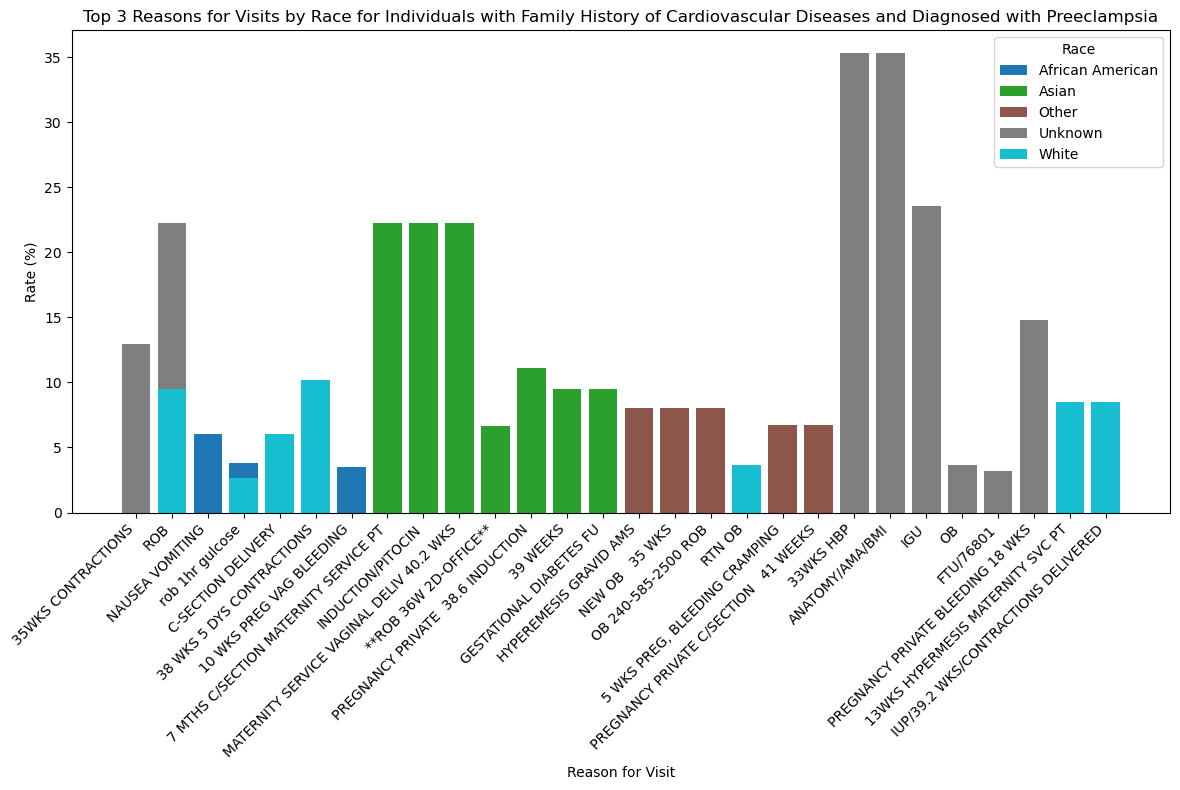

/var/folders/c7/mwgyyxds33bg8rksxm07_r_00000gn/T/ipykernel_92947/9240339.py:96: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(age_groups))


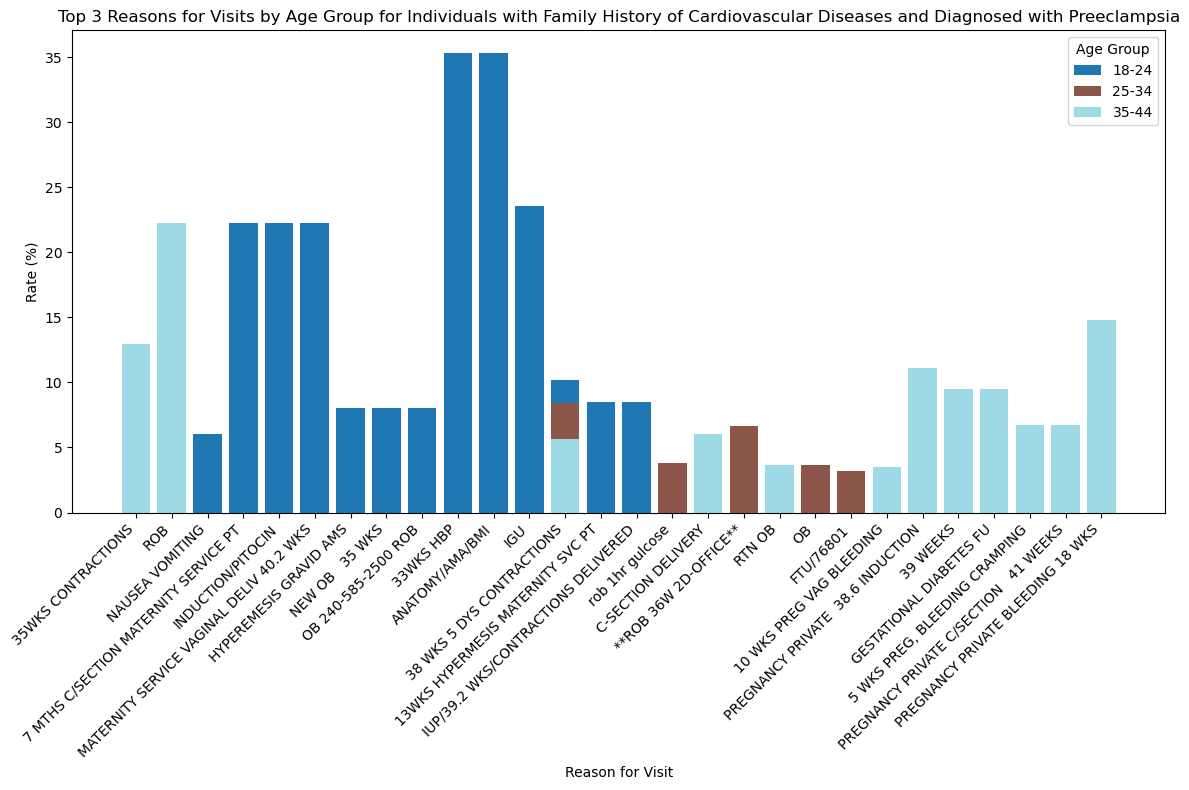

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
new_person = pd.read_csv('synth_New_Person.csv')
new_family_hx = pd.read_csv('synth_New_FamilyHX.csv')
visits_df = pd.read_csv('synth_New_Visits.csv')
new_diagnosis = pd.read_csv('synth_New_Diagnosis.csv')

# Define the cardiovascular diseases and preeclampsia-related conditions
cardiovascular_diseases = [
    'High blood pressure', 'Diabetes', 'Diabetes mellitus', 'Diabetes mellitus type 1',
    'Hypertension', 'Heart Attack', 'Stroke', 'Heart Disease', 'High cholesterol',
    'Hypercholesteremia', 'Hyperlipidemia'
]
preeclampsia_events = ['Preeclampsia', 'High Blood Pressure', 'Hypertension']

# Filter for individuals with a family history of cardiovascular diseases
family_hx_cardiovascular = new_family_hx[new_family_hx['CONDITION'].isin(cardiovascular_diseases)]

# Merge family history with person dataset to get race and age group information
merged_person_familyhx = new_person.merge(family_hx_cardiovascular, on='PERSON_ID', how='inner')

# Filter for individuals diagnosed with preeclampsia-related conditions
diagnosis_preeclampsia = new_diagnosis[new_diagnosis['EVENT_DESC'].str.contains('|'.join(preeclampsia_events), case=False, na=False)]

# Merge the datasets to find individuals meeting both criteria
merged_df_preeclampsia = merged_person_familyhx.merge(diagnosis_preeclampsia, on='PERSON_ID', how='inner')

# Calculate the total number of patients by race and age group with a family history of cardiometabolic diagnosis
preeclampsia_event_desc = merged_df_preeclampsia[['PERSON_ID', 'RACE', 'AGE_GROUP', 'EVENT_DESC']].drop_duplicates()

# Filter for specified races
specified_races = ['White', 'African American', 'Other', 'Unknown', 'Asian']
filtered_preeclampsia_event_desc = preeclampsia_event_desc[preeclampsia_event_desc['RACE'].isin(specified_races)]

# Total count by race and age group
total_by_race_age_group = merged_person_familyhx[merged_person_familyhx['RACE'].isin(specified_races)].groupby(['RACE', 'AGE_GROUP']).size().reset_index(name='Total_Count')
preeclampsia_event_desc_counts = filtered_preeclampsia_event_desc.groupby(['RACE', 'AGE_GROUP']).size().reset_index(name='Preeclampsia_Count')

# Merge the counts to calculate the rates
rates_by_race_age_group = pd.merge(total_by_race_age_group, preeclampsia_event_desc_counts, on=['RACE', 'AGE_GROUP'], how='left')
rates_by_race_age_group['Preeclampsia_Rate'] = (rates_by_race_age_group['Preeclampsia_Count'] / rates_by_race_age_group['Total_Count']) * 100
rates_by_race_age_group = rates_by_race_age_group.fillna(0)
print(rates_by_race_age_group[['RACE', 'AGE_GROUP', 'Total_Count', 'Preeclampsia_Count', 'Preeclampsia_Rate']])

# Merge with visits data to get reason for visit
merged_visits = visits_df.merge(merged_df_preeclampsia[['PERSON_ID', 'RACE', 'AGE_GROUP']], on='PERSON_ID', how='inner')

# Filter for specified races
filtered_visits_df = merged_visits[merged_visits['RACE'].isin(specified_races)]

# Group by RACE, AGE_GROUP, and REASON_FOR_VISIT and count the occurrences
visit_reason_counts = filtered_visits_df.groupby(['RACE', 'AGE_GROUP', 'REASON_FOR_VISIT']).size().reset_index(name='Count')

# Merge visit reason counts with the rates by race and age group to get the rates
visit_reason_counts = visit_reason_counts.merge(rates_by_race_age_group[['RACE', 'AGE_GROUP', 'Preeclampsia_Count']], on=['RACE', 'AGE_GROUP'], how='left')

# Calculate the rate for each reason for visit
visit_reason_counts['Rate'] = (visit_reason_counts['Count'] / visit_reason_counts['Preeclampsia_Count']) * 100

# Get the top three reasons for visits for each race and age group
top_3_reasons_per_race_age_group = visit_reason_counts.groupby(['RACE', 'AGE_GROUP']).apply(lambda x: x.nlargest(3, 'Rate')).reset_index(drop=True)

# Display the table of top 3 reasons per race and age group
print("\nTop 3 Reasons for Visits by Race and Age Group:")
print(top_3_reasons_per_race_age_group)

# Create the bar graph for race
fig, ax = plt.subplots(figsize=(12, 8))

# Define colors for each race
colors = plt.cm.get_cmap('tab10', len(top_3_reasons_per_race_age_group['RACE'].unique()))

# Plot each race's top 3 reasons for visit
for idx, race in enumerate(top_3_reasons_per_race_age_group['RACE'].unique()):
    race_data = top_3_reasons_per_race_age_group[top_3_reasons_per_race_age_group['RACE'] == race]
    ax.bar(race_data['REASON_FOR_VISIT'], race_data['Rate'], color=colors(idx), label=race)

# Customize the plot
ax.set_xlabel('Reason for Visit')
ax.set_ylabel('Rate (%)')
ax.set_title('Top 3 Reasons for Visits by Race for Individuals with Family History of Cardiovascular Diseases and Diagnosed with Preeclampsia')
ax.legend(title='Race')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

# Create the bar graph for age group
fig, ax = plt.subplots(figsize=(12, 8))

# Define colors for each age group
age_groups = top_3_reasons_per_race_age_group['AGE_GROUP'].unique()
colors = plt.cm.get_cmap('tab20', len(age_groups))

# Plot each age group's top 3 reasons for visit
for idx, age_group in enumerate(age_groups):
    age_group_data = top_3_reasons_per_race_age_group[top_3_reasons_per_race_age_group['AGE_GROUP'] == age_group]
    ax.bar(age_group_data['REASON_FOR_VISIT'], age_group_data['Rate'], color=colors(idx), label=age_group)

# Customize the plot
ax.set_xlabel('Reason for Visit')
ax.set_ylabel('Rate (%)')
ax.set_title('Top 3 Reasons for Visits by Age Group for Individuals with Family History of Cardiovascular Diseases and Diagnosed with Preeclampsia')
ax.legend(title='Age Group')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

In [56]:
merged_df_preeclampsia = merged_person_familyhx.merge(diagnosis_preeclampsia, on='PERSON_ID', how='left', indicator=True)
merged_df_preeclampsia['Preeclampsia'] = merged_df_preeclampsia['_merge'] == 'both'
merged_df_preeclampsia['Preeclampsia'] = merged_df_preeclampsia['Preeclampsia'].astype(int)

data = merged_df_preeclampsia[['RACE', 'Preeclampsia']]

le_race = LabelEncoder()
data['RACE'] = le_race.fit_transform(data['RACE'])

X = data[['RACE']]
y = data['Preeclampsia']
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = sm.Logit(y_train, X_train)
result = model.fit()

print(result.summary())

y_pred = result.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

print(confusion_matrix(y_test, y_pred_binary))
print(classification_report(y_test, y_pred_binary))

odds_ratios = pd.DataFrame({
    'Variable': X.columns,
    'Odds Ratio': result.params.apply(lambda x: round(np.exp(x), 2)),
    'P-Value': result.pvalues
})
print(odds_ratios)

Optimization terminated successfully.
         Current function value: 0.646628
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:           Preeclampsia   No. Observations:                 9688
Model:                          Logit   Df Residuals:                     9686
Method:                           MLE   Df Model:                            1
Date:                Tue, 06 Aug 2024   Pseudo R-squ.:               9.546e-05
Time:                        12:37:43   Log-Likelihood:                -6264.5
converged:                       True   LL-Null:                       -6265.1
Covariance Type:            nonrobust   LLR p-value:                    0.2741
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6587      0.038     17.325      0.000       0.584       0.733
RACE          -0.0054      0.

/var/folders/c7/mwgyyxds33bg8rksxm07_r_00000gn/T/ipykernel_63397/3769754568.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['RACE'] = le_race.fit_transform(data['RACE'])
/Users/yarayaghi/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yarayaghi/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter t

In [68]:
merged_df_preeclampsia = merged_person_familyhx.merge(diagnosis_preeclampsia, on='PERSON_ID', how='left', indicator=True)
merged_df_preeclampsia['Preeclampsia'] = merged_df_preeclampsia['_merge'] == 'both'
merged_df_preeclampsia['Preeclampsia'] = merged_df_preeclampsia['Preeclampsia'].astype(int)

data = merged_df_preeclampsia[['RACE', 'AGE_GROUP', 'Preeclampsia']]

le_race = LabelEncoder()
le_age_group = LabelEncoder()
data['RACE'] = le_race.fit_transform(data['RACE'])
data['AGE_GROUP'] = le_age_group.fit_transform(data['AGE_GROUP'])

X = data[['RACE', 'AGE_GROUP']]
y = data['Preeclampsia']
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = sm.OLS(y_train, X_train)
result = model.fit()

print(result.summary())

y_pred = result.predict(X_test)
mse = np.mean((y_test - y_pred) ** 2)
print(f'Mean Squared Error: {mse}')

                            OLS Regression Results                            
Dep. Variable:           Preeclampsia   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6479
Date:                Tue, 06 Aug 2024   Prob (F-statistic):              0.523
Time:                        14:30:41   Log-Likelihood:                -6566.2
No. Observations:                9688   AIC:                         1.314e+04
Df Residuals:                    9685   BIC:                         1.316e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6557      0.013     48.689      0.0

/var/folders/c7/mwgyyxds33bg8rksxm07_r_00000gn/T/ipykernel_63397/252862885.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['RACE'] = le_race.fit_transform(data['RACE'])
/var/folders/c7/mwgyyxds33bg8rksxm07_r_00000gn/T/ipykernel_63397/252862885.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['AGE_GROUP'] = le_age_group.fit_transform(data['AGE_GROUP'])


In [69]:
y_train_mean = np.mean(y_train)

baseline_predictions = np.full_like(y_test, y_train_mean)

baseline_mse = mean_squared_error(y_test, baseline_predictions)

print(f'Baseline Mean Squared Error: {baseline_mse}')

Baseline Mean Squared Error: 0.6370423892100193


In [70]:
hypertension_cholesterol = ['High blood pressure', 'Hypertension', 'High cholesterol', 'Hypercholesteremia', 'Hyperlipidemia']
diabetes_conditions = ['Diabetes', 'Diabetes mellitus', 'Diabetes mellitus type 1']
cardiovascular_diseases = ['Heart Attack', 'Stroke', 'Heart Disease']

new_family_hx['Hypertension_Cholesterol'] = new_family_hx['CONDITION'].isin(hypertension_cholesterol).astype(int)
new_family_hx['Diabetes'] = new_family_hx['CONDITION'].isin(diabetes_conditions).astype(int)
new_family_hx['Cardiovascular_Diseases'] = new_family_hx['CONDITION'].isin(cardiovascular_diseases).astype(int)

family_hx_grouped = new_family_hx.groupby('PERSON_ID').agg({
    'Hypertension_Cholesterol': 'max',
    'Diabetes': 'max',
    'Cardiovascular_Diseases': 'max'
}).reset_index()

merged_person_familyhx = new_person.merge(family_hx_grouped, on='PERSON_ID', how='inner')

preeclampsia_events = ['Hypertension', 'High blood pressure', 'Pre-eclampsia']
diagnosis_preeclampsia = new_diagnosis[new_diagnosis['EVENT_DESC'].str.contains('|'.join(preeclampsia_events), case=False, na=False)]

merged_person_familyhx['Preeclampsia'] = merged_person_familyhx['PERSON_ID'].isin(diagnosis_preeclampsia['PERSON_ID']).astype(int)

X = merged_person_familyhx[['RACE', 'AGE_GROUP', 'Hypertension_Cholesterol', 'Diabetes', 'Cardiovascular_Diseases']]  # Features
y = merged_person_familyhx['Preeclampsia']  # Target variable
X_encoded = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

base_learners = [
    ('lr', LogisticRegression(solver='liblinear')),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('svc', SVC(probability=True, random_state=42))
]


meta_classifier = LogisticRegression(solver='liblinear')
stacking_clf = StackingClassifier(estimators=base_learners, final_estimator=meta_classifier, cv=5)
stacking_clf.fit(X_train, y_train)

y_pred = stacking_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Accuracy: 0.7126285839352156
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1313
           1       0.71      1.00      0.83      3256

    accuracy                           0.71      4569
   macro avg       0.36      0.50      0.42      4569
weighted avg       0.51      0.71      0.59      4569



/Users/yarayaghi/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yarayaghi/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yarayaghi/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pandas as pd
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Load the datasets
new_person = pd.read_csv('synth_New_Person.csv')
new_family_hx = pd.read_csv('synth_New_FamilyHX.csv')
new_diagnosis = pd.read_csv('synth_New_Diagnosis.csv')
new_visits = pd.read_csv('synth_New_Visits.csv')

# Define the family history categories
hypertension_cholesterol = ['High blood pressure', 'Hypertension', 'High cholesterol', 'Hypercholesteremia', 'Hyperlipidemia']
diabetes_conditions = ['Diabetes', 'Diabetes mellitus', 'Diabetes mellitus type 1']
cardiovascular_diseases = ['Heart Attack', 'Stroke', 'Heart Disease']

# Create binary columns for each category
new_family_hx['Hypertension_Cholesterol'] = new_family_hx['CONDITION'].isin(hypertension_cholesterol).astype(int)
new_family_hx['Diabetes'] = new_family_hx['CONDITION'].isin(diabetes_conditions).astype(int)
new_family_hx['Cardiovascular_Diseases'] = new_family_hx['CONDITION'].isin(cardiovascular_diseases).astype(int)

# Group by PERSON_ID and aggregate the maximum value (1 if any condition exists, else 0)
family_hx_grouped = new_family_hx.groupby('PERSON_ID').agg({
    'Hypertension_Cholesterol': 'max',
    'Diabetes': 'max',
    'Cardiovascular_Diseases': 'max'
}).reset_index()

# Merge with the person dataset to get race and age group information
merged_person_familyhx = new_person.merge(family_hx_grouped, on='PERSON_ID', how='inner')

# Filter the Diagnosis dataset for preeclampsia-related event descriptions
preeclampsia_events = ['Hypertension', 'High blood pressure', 'Pre-eclampsia']
diagnosis_preeclampsia = new_diagnosis[new_diagnosis['EVENT_DESC'].str.contains('|'.join(preeclampsia_events), case=False, na=False)]

# Merge with the visits dataset to get reason for visit
merged_person_familyhx = merged_person_familyhx.merge(new_visits[['PERSON_ID', 'REASON_FOR_VISIT']], on='PERSON_ID', how='left')

# Create the target variable (1 for preeclampsia, 0 otherwise)
merged_person_familyhx['Preeclampsia'] = merged_person_familyhx['PERSON_ID'].isin(diagnosis_preeclampsia['PERSON_ID']).astype(int)

# Define the features and target variable
X = merged_person_familyhx[['RACE', 'AGE_GROUP', 'Hypertension_Cholesterol', 'Diabetes', 'Cardiovascular_Diseases', 'REASON_FOR_VISIT']]  # Features
y = merged_person_familyhx['Preeclampsia']  # Target variable

# One-hot encode the categorical variables
X_encoded = pd.get_dummies(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Define the base classifiers
base_learners = [
    ('lr', LogisticRegression(solver='liblinear')),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('svc', SVC(probability=True, random_state=42))
]

# Define the meta-classifier
meta_classifier = LogisticRegression(solver='liblinear')

# Define the Stacking classifier
stacking_clf = StackingClassifier(estimators=base_learners, final_estimator=meta_classifier, cv=5)

# Fit the Stacking classifier
stacking_clf.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = stacking_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))